Dose: Sem Irradiar
  RNA Fragmentos: 65, RNA Perímetro: 575.50
  DNA Fragmentos: 1779, DNA Perímetro: 80876.32

Dose: 0.4 Gy
  RNA Fragmentos: 5, RNA Perímetro: 54.38
  DNA Fragmentos: 1552, DNA Perímetro: 103121.98

Dose: 0.7 Gy
  RNA Fragmentos: 163, RNA Perímetro: 1699.84
  DNA Fragmentos: 1628, DNA Perímetro: 37016.88

Dose: 1 Gy
  RNA Fragmentos: 112, RNA Perímetro: 1205.88
  DNA Fragmentos: 1315, DNA Perímetro: 29481.01



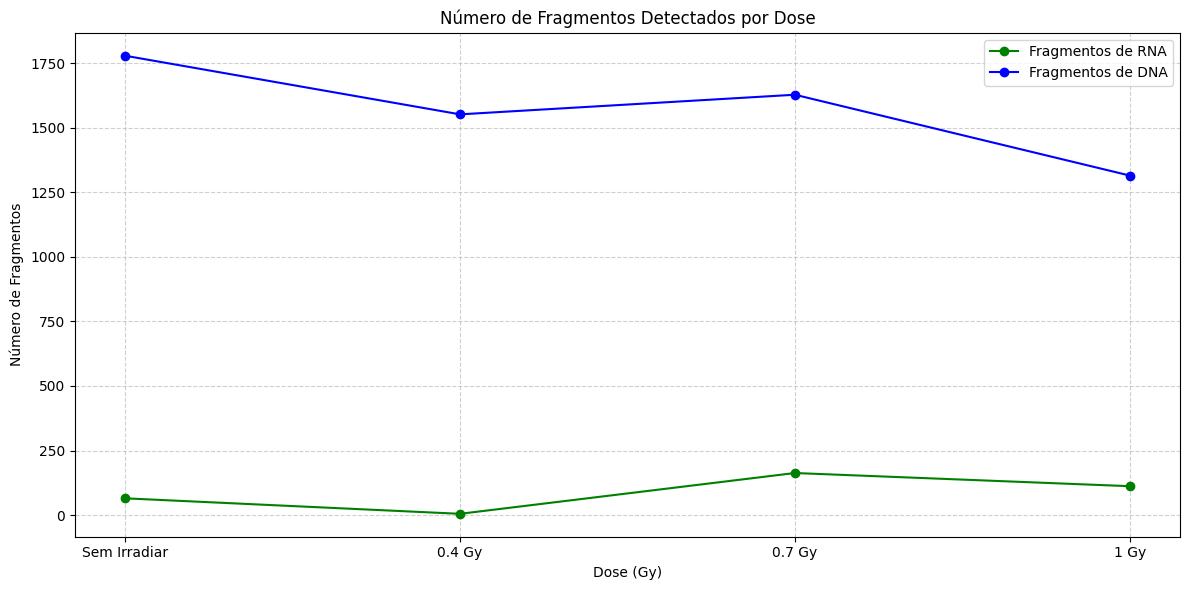

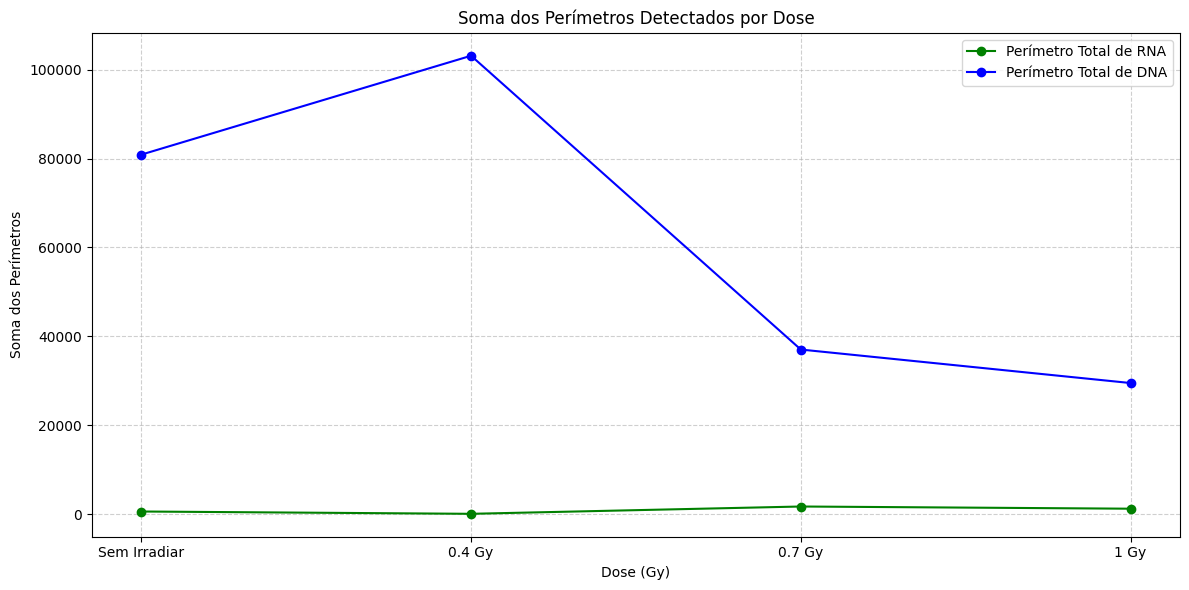

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_images(image_paths):
    results = []

    for dose, image_path in image_paths.items():
        # Carregar a imagem
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Verificar se a imagem foi carregada corretamente
        if image is None:
            raise FileNotFoundError(f"A imagem no caminho '{image_path}' não foi encontrada ou está vazia. Verifique o caminho e tente novamente.")

        # Obter dimensões da imagem
        height, width = image.shape  # Extrair altura e largura

        # Definir o fator de conversão com base na resolução
        if width == 256:
            conversion_factor = 11.72  # nm/px para imagens 256x256
        elif width == 258:
            conversion_factor = 11.63  # nm/px para imagens 258x258
        elif width == 512:
            conversion_factor = 5.86  # nm/px para imagens 512x512
        elif width == 514:
            conversion_factor = 5.79  # nm/px para imagens 514x514
        elif width == 1024:
            conversion_factor = 2.93  # nm/px para imagens 1024x1024
        else:
            raise ValueError(f"Resolução {width}x{height} não suportada. Adapte o fator de conversão.")

        # Aplicar detecção de bordas e encontrar contornos
        edges = cv2.Canny(image, 100, 200)
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        dna_perimeters, rna_perimeters = [], []

        for contour in contours:
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)
            if perimeter == 0:
                continue

            circularity = 4 * np.pi * (area / (perimeter ** 2))
            if circularity > 0.8:
                rna_perimeters.append(perimeter)
            else:
                dna_perimeters.append(perimeter)

        results.append({
            'Dose': dose,
            'Num RNA': len(rna_perimeters),
            'Perímetro RNA': sum(rna_perimeters),
            'Num DNA': len(dna_perimeters),
            'Perímetro DNA': sum(dna_perimeters)
        })

    return results

def plot_results(results):
    doses = [r['Dose'] for r in results]
    rna_fragments = [r['Num RNA'] for r in results]
    dna_fragments = [r['Num DNA'] for r in results]
    rna_perimeters = [r['Perímetro RNA'] for r in results]
    dna_perimeters = [r['Perímetro DNA'] for r in results]

    plt.figure(figsize=(12, 6))
    plt.plot(doses, rna_fragments, 'o-', label='Fragmentos de RNA', color='green')
    plt.plot(doses, dna_fragments, 'o-', label='Fragmentos de DNA', color='blue')
    plt.title('Número de Fragmentos Detectados por Dose')
    plt.xlabel('Dose (Gy)')
    plt.ylabel('Número de Fragmentos')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(doses, rna_perimeters, 'o-', label='Perímetro Total de RNA', color='green')
    plt.plot(doses, dna_perimeters, 'o-', label='Perímetro Total de DNA', color='blue')
    plt.title('Soma dos Perímetros Detectados por Dose')
    plt.xlabel('Dose (Gy)')
    plt.ylabel('Soma dos Perímetros')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    image_paths = {
    'Sem Irradiar': '/content/sem irradirar_3X3_3min_water bath 2023-10-26 14h43m01.png',
    '0.4 Gy': '/content/Amostra_0,4Gy_01.png',
    '0.7 Gy': '/content/Amostrairradiada_01_0,7Gy_5x5.png',
    '1 Gy': '/content/Amostrairradiada_02_1Gy_3x3.png'
    }

    results = process_images(image_paths)
    for r in results:
        print(f"Dose: {r['Dose']}")
        print(f"  RNA Fragmentos: {r['Num RNA']}, RNA Perímetro: {r['Perímetro RNA']:.2f}")
        print(f"  DNA Fragmentos: {r['Num DNA']}, DNA Perímetro: {r['Perímetro DNA']:.2f}\n")

    plot_results(results)

if __name__ == "__main__":
    main()


Dose: Sem Irradiar
  RNA Fragmentos: 65, RNA Perímetro: 575.50
  DNA Fragmentos: 1779, DNA Perímetro: 80876.32

Dose: 0.4 Gy
  RNA Fragmentos: 5, RNA Perímetro: 54.38
  DNA Fragmentos: 1552, DNA Perímetro: 103121.98

Dose: 0.7 Gy
  RNA Fragmentos: 163, RNA Perímetro: 1699.84
  DNA Fragmentos: 1628, DNA Perímetro: 37016.88

Dose: 1 Gy
  RNA Fragmentos: 112, RNA Perímetro: 1205.88
  DNA Fragmentos: 1315, DNA Perímetro: 29481.01



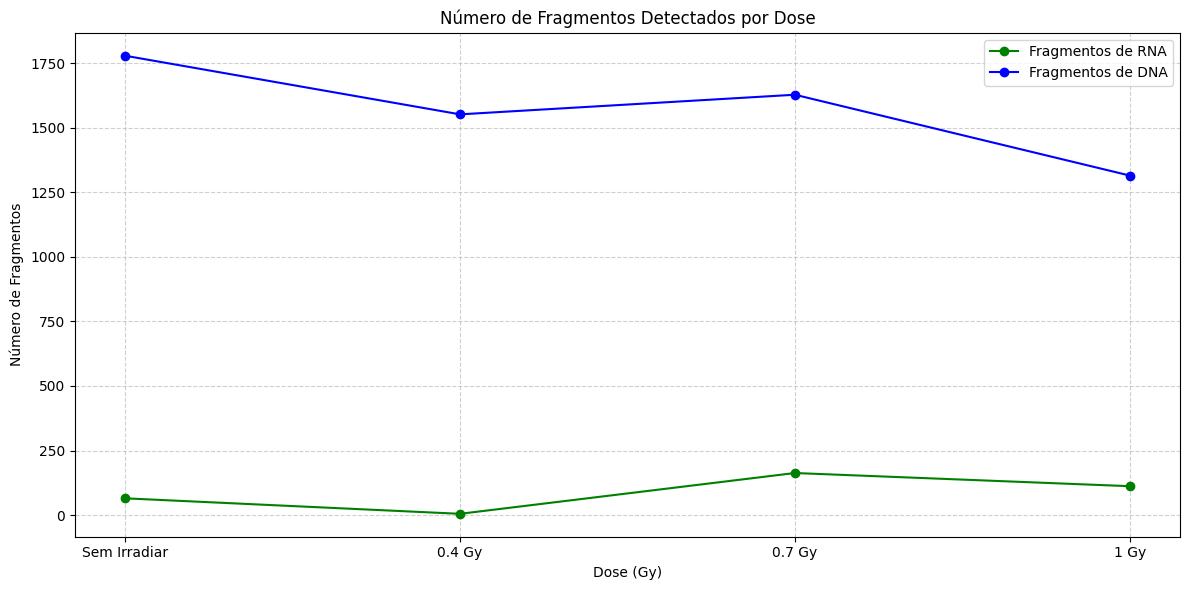

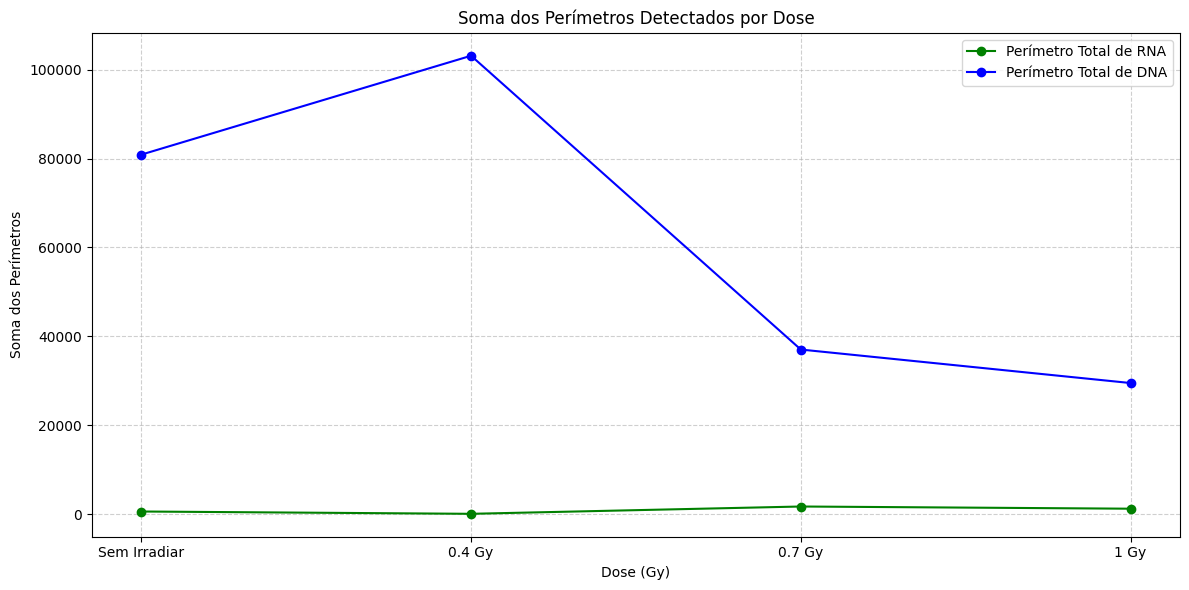

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_images(image_paths):
    results = []

    for dose, image_path in image_paths.items():
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise FileNotFoundError(f"Imagem não encontrada: {image_path}")

        edges = cv2.Canny(image, 100, 200)
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        dna_perimeters, rna_perimeters = [], []

        for contour in contours:
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)
            if perimeter == 0:
                continue

            circularity = 4 * np.pi * (area / (perimeter ** 2))
            if circularity > 0.8:
                rna_perimeters.append(perimeter)
            else:
                dna_perimeters.append(perimeter)

        results.append({
            'Dose': dose,
            'Num RNA': len(rna_perimeters),
            'Perímetro RNA': sum(rna_perimeters),
            'Num DNA': len(dna_perimeters),
            'Perímetro DNA': sum(dna_perimeters)
        })

    return results

def plot_results(results):
    doses = [r['Dose'] for r in results]
    rna_fragments = [r['Num RNA'] for r in results]
    dna_fragments = [r['Num DNA'] for r in results]
    rna_perimeters = [r['Perímetro RNA'] for r in results]
    dna_perimeters = [r['Perímetro DNA'] for r in results]

    plt.figure(figsize=(12, 6))
    plt.plot(doses, rna_fragments, 'o-', label='Fragmentos de RNA', color='green')
    plt.plot(doses, dna_fragments, 'o-', label='Fragmentos de DNA', color='blue')
    plt.title('Número de Fragmentos Detectados por Dose')
    plt.xlabel('Dose (Gy)')
    plt.ylabel('Número de Fragmentos')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(doses, rna_perimeters, 'o-', label='Perímetro Total de RNA', color='green')
    plt.plot(doses, dna_perimeters, 'o-', label='Perímetro Total de DNA', color='blue')
    plt.title('Soma dos Perímetros Detectados por Dose')
    plt.xlabel('Dose (Gy)')
    plt.ylabel('Soma dos Perímetros')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    image_paths = {
    'Sem Irradiar': '/content/sem irradirar_3X3_3min_water bath 2023-10-26 14h43m01.png',
    '0.4 Gy': '/content/Amostra_0,4Gy_01.png',
    '0.7 Gy': '/content/Amostrairradiada_01_0,7Gy_5x5.png',
    '1 Gy': '/content/Amostrairradiada_02_1Gy_3x3.png'
    }

    results = process_images(image_paths)
    for r in results:
        print(f"Dose: {r['Dose']}")
        print(f"  RNA Fragmentos: {r['Num RNA']}, RNA Perímetro: {r['Perímetro RNA']:.2f}")
        print(f"  DNA Fragmentos: {r['Num DNA']}, DNA Perímetro: {r['Perímetro DNA']:.2f}\n")

    plot_results(results)

if __name__ == "__main__":
    main()


Dose: Sem Irradiar
  Comprimento Esquelético: 310413.48 nm

Dose: 0.4 Gy
  Comprimento Esquelético: 344076.54 nm

Dose: 0.7 Gy
  Comprimento Esquelético: 155432.55 nm

Dose: 1 Gy
  Comprimento Esquelético: 125220.33 nm



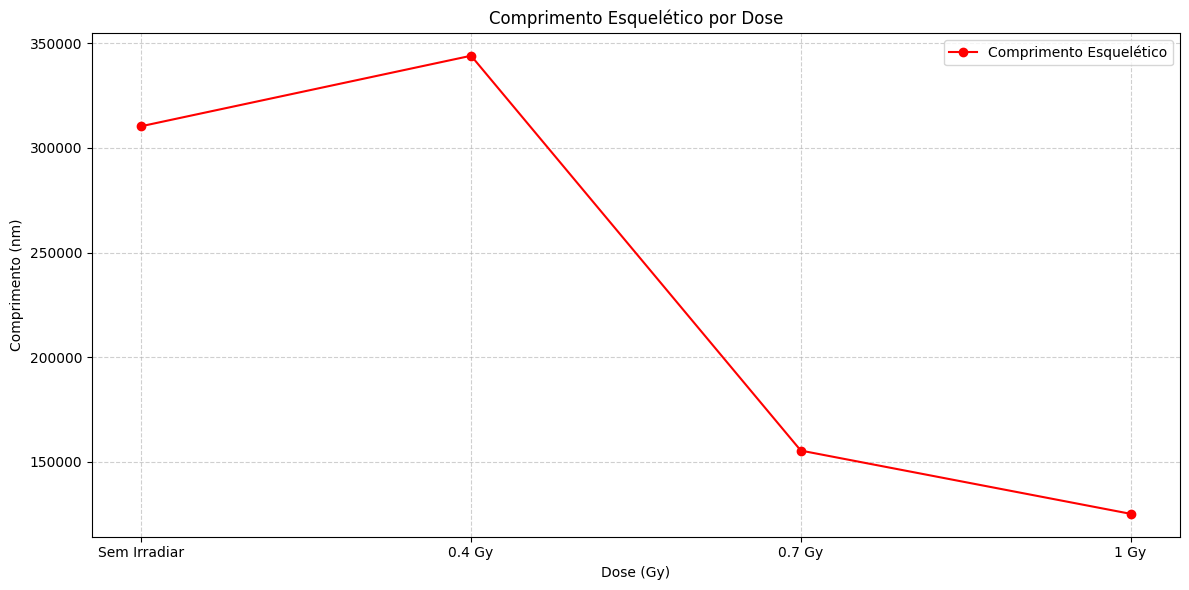

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_skeleton_length(image):
    """ Calcula o comprimento do esqueleto da imagem. """
    skeleton = cv2.ximgproc.thinning(image)  # Reduz para esqueleto de 1 pixel
    return np.sum(skeleton > 0)  # Conta os pixels no esqueleto

def process_images(image_paths):
    results = []

    for dose, image_path in image_paths.items():
        # Carregar a imagem
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Verificar se a imagem foi carregada corretamente
        if image is None:
            raise FileNotFoundError(f"A imagem no caminho '{image_path}' não foi encontrada ou está vazia.")

        # Obter dimensões da imagem
        height, width = image.shape

        # Definir o fator de conversão com base na resolução
        conversion_factors = {256: 11.72, 258: 11.63, 512: 5.86, 514: 5.79, 1024: 2.93}
        if width in conversion_factors:
            conversion_factor = conversion_factors[width]
        else:
            raise ValueError(f"Resolução {width}x{height} não suportada.")

        # Aplicar detecção de bordas e encontrar contornos
        edges = cv2.Canny(image, 100, 200)

        # Medir comprimento do esqueleto
        skeleton_length = compute_skeleton_length(edges) * conversion_factor

        results.append({
            'Dose': dose,
            'Comprimento Esquelético': skeleton_length
        })

    return results

def plot_results(results):
    doses = [r['Dose'] for r in results]
    skeleton_lengths = [r['Comprimento Esquelético'] for r in results]

    plt.figure(figsize=(12, 6))
    plt.plot(doses, skeleton_lengths, 'o-', label='Comprimento Esquelético', color='red')
    plt.title('Comprimento Esquelético por Dose')
    plt.xlabel('Dose (Gy)')
    plt.ylabel('Comprimento (nm)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    image_paths = {
        'Sem Irradiar': '/content/sem irradirar_3X3_3min_water bath 2023-10-26 14h43m01.png',
        '0.4 Gy': '/content/Amostra_0,4Gy_01.png',
        '0.7 Gy': '/content/Amostrairradiada_01_0,7Gy_5x5.png',
        '1 Gy': '/content/Amostrairradiada_02_1Gy_3x3.png'
    }

    results = process_images(image_paths)
    for r in results:
        print(f"Dose: {r['Dose']}")
        print(f"  Comprimento Esquelético: {r['Comprimento Esquelético']:.2f} nm\n")

    plot_results(results)

if __name__ == "__main__":
    main()


Dose: Sem Irradiar
  Comprimento Esquelético: 205955.67 nm

Dose: 0.4 Gy
  Comprimento Esquelético: 340897.83 nm

Dose: 0.7 Gy
  Comprimento Esquelético: 222405.48 nm

Dose: 1 Gy
  Comprimento Esquelético: 154697.22 nm



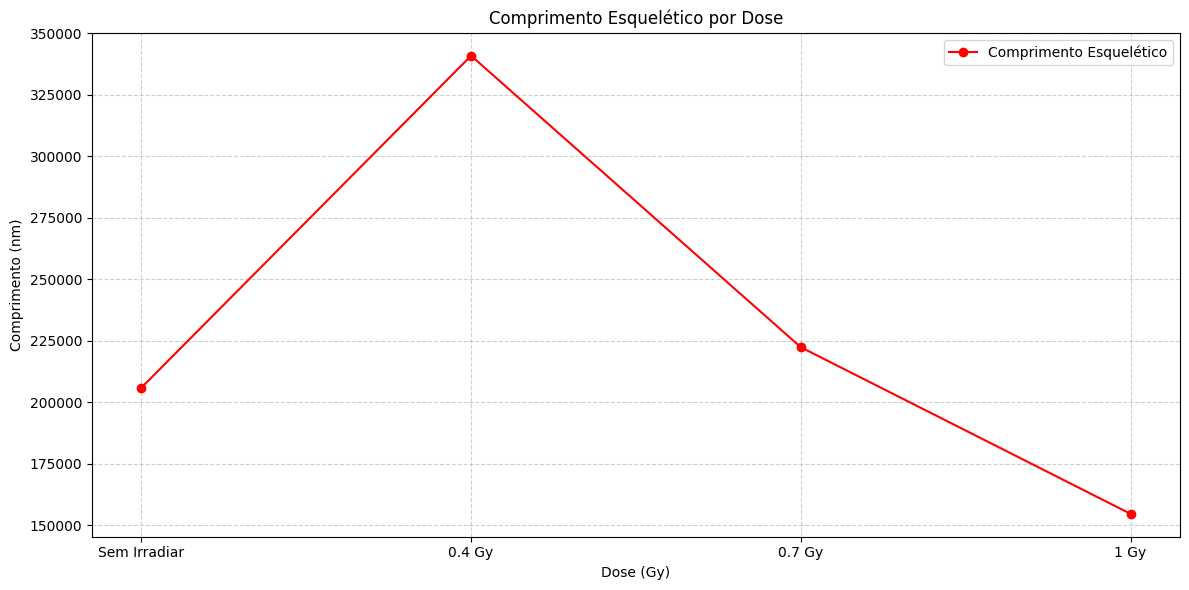

In [ ]:
#IMAGENS DO TCC DE MATHEUS
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_skeleton_length(image):
    """ Calcula o comprimento do esqueleto da imagem. """
    skeleton = cv2.ximgproc.thinning(image)  # Reduz para esqueleto de 1 pixel
    return np.sum(skeleton > 0)  # Conta os pixels no esqueleto

def process_images(image_paths):
    results = []

    for dose, image_path in image_paths.items():
        # Carregar a imagem
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Verificar se a imagem foi carregada corretamente
        if image is None:
            raise FileNotFoundError(f"A imagem no caminho '{image_path}' não foi encontrada ou está vazia.")

        # Obter dimensões da imagem
        height, width = image.shape

        # Definir o fator de conversão com base na resolução
        conversion_factors = {256: 11.72, 258: 11.63, 512: 5.86, 514: 5.79, 1024: 2.93}
        if width in conversion_factors:
            conversion_factor = conversion_factors[width]
        else:
            raise ValueError(f"Resolução {width}x{height} não suportada.")

        # Aplicar detecção de bordas e encontrar contornos
        edges = cv2.Canny(image, 100, 200)

        # Medir comprimento do esqueleto
        skeleton_length = compute_skeleton_length(edges) * conversion_factor

        results.append({
            'Dose': dose,
            'Comprimento Esquelético': skeleton_length
        })

    return results

def plot_results(results):
    doses = [r['Dose'] for r in results]
    skeleton_lengths = [r['Comprimento Esquelético'] for r in results]

    plt.figure(figsize=(12, 6))
    plt.plot(doses, skeleton_lengths, 'o-', label='Comprimento Esquelético', color='red')
    plt.title('Comprimento Esquelético por Dose')
    plt.xlabel('Dose (Gy)')
    plt.ylabel('Comprimento (nm)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    image_paths = {
        'Sem Irradiar': '/content/Amostra Test 1_sem irradiar 2023-08-23 08h42m28.png',
        '0.4 Gy': '/content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png',
        '0.7 Gy': '/content/Water Bath 0,7Gy 2023-10-25 14h57m27.png',
        '1 Gy': '/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png'
    }

    results = process_images(image_paths)
    for r in results:
        print(f"Dose: {r['Dose']}")
        print(f"  Comprimento Esquelético: {r['Comprimento Esquelético']:.2f} nm\n")

    plot_results(results)

if __name__ == "__main__":
    main()


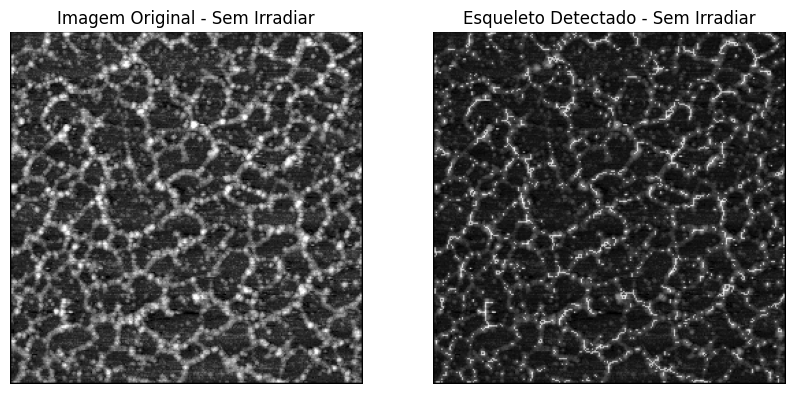

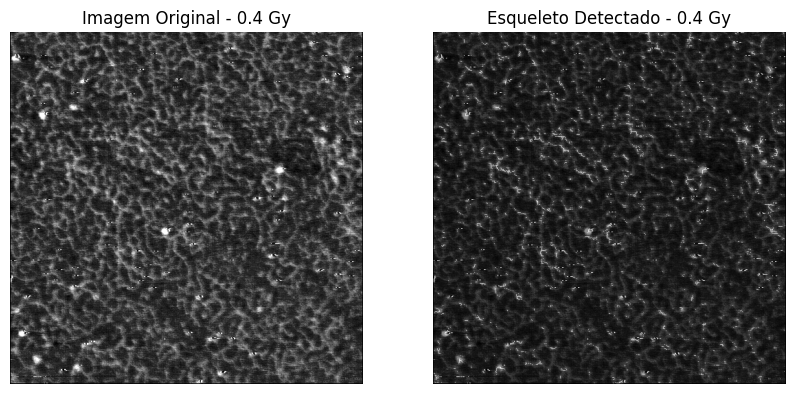

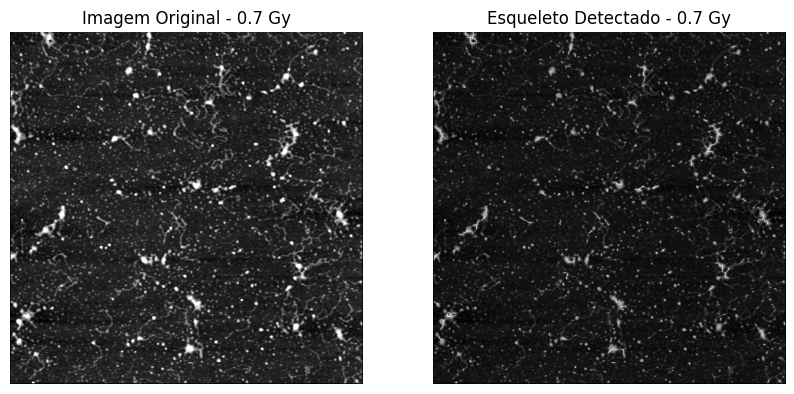

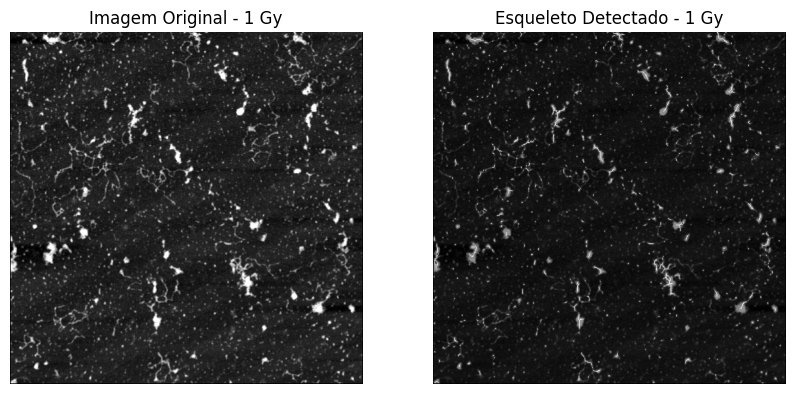

Dose: Sem Irradiar
  Comprimento Esquelético: 32657.04 nm

Dose: 0.4 Gy
  Comprimento Esquelético: 23547.93 nm

Dose: 0.7 Gy
  Comprimento Esquelético: 13276.47 nm

Dose: 1 Gy
  Comprimento Esquelético: 12083.73 nm



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_skeleton(image):
    """ Aplica o algoritmo de thinning para extrair o esqueleto. """
    skeleton = cv2.ximgproc.thinning(image)
    return skeleton

def process_images(image_paths):
    results = []

    for dose, image_path in image_paths.items():
        # Carregar a imagem
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Verificar se a imagem foi carregada corretamente
        if image is None:
            raise FileNotFoundError(f"A imagem no caminho '{image_path}' não foi encontrada ou está vazia.")

        # Obter dimensões da imagem
        height, width = image.shape

        # Definir o fator de conversão com base na resolução
        conversion_factors = {256: 11.72, 258: 11.63, 512: 5.86, 514: 5.79, 1024: 2.93}
        conversion_factor = conversion_factors.get(width, None)
        if conversion_factor is None:
            raise ValueError(f"Resolução {width}x{height} não suportada.")

        # Aplicar binarização para destacar as estruturas
        _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

        # Obter esqueleto da imagem
        skeleton = compute_skeleton(binary_image)

        # Medir comprimento do esqueleto
        skeleton_length = np.sum(skeleton > 0) * conversion_factor

        # Criar imagem de sobreposição do esqueleto
        skeleton_color = cv2.cvtColor(skeleton, cv2.COLOR_GRAY2BGR)
        skeleton_color[:, :, 2] = skeleton  # Destaca em vermelho
        overlay = cv2.addWeighted(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), 0.6, skeleton_color, 0.4, 0)

        # Mostrar imagem original e com esqueleto
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Imagem Original - {dose}')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(overlay)
        plt.title(f'Esqueleto Detectado - {dose}')
        plt.axis('off')

        plt.show()

        results.append({
            'Dose': dose,
            'Comprimento Esquelético': skeleton_length
        })

    return results

def main():
    image_paths = {
        'Sem Irradiar': '/content/Amostra Test 1_sem irradiar 2023-08-23 08h42m28.png',
        '0.4 Gy': '/content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png',
        '0.7 Gy': '/content/Water Bath 0,7Gy 2023-10-25 14h57m27.png',
        '1 Gy': '/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png'
    }

    results = process_images(image_paths)
    for r in results:
        print(f"Dose: {r['Dose']}")
        print(f"  Comprimento Esquelético: {r['Comprimento Esquelético']:.2f} nm\n")

if __name__ == "__main__":
    main()


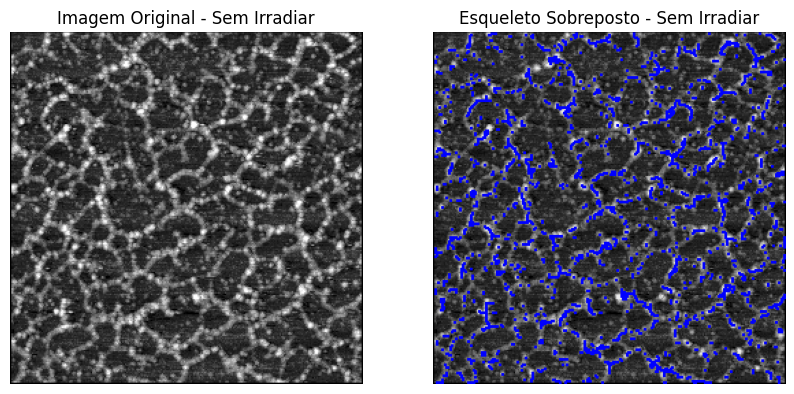

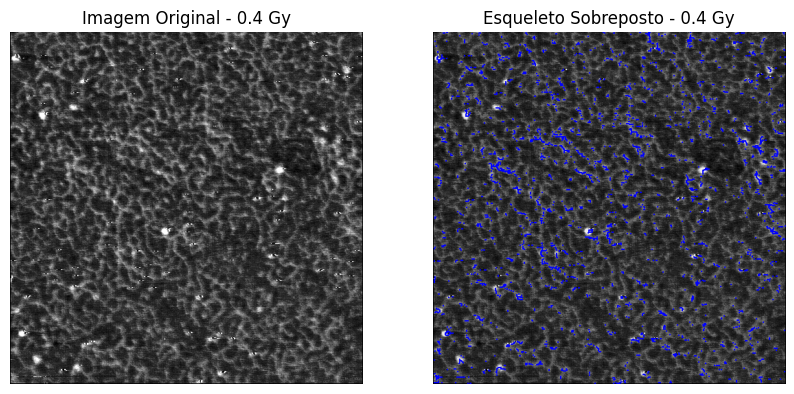

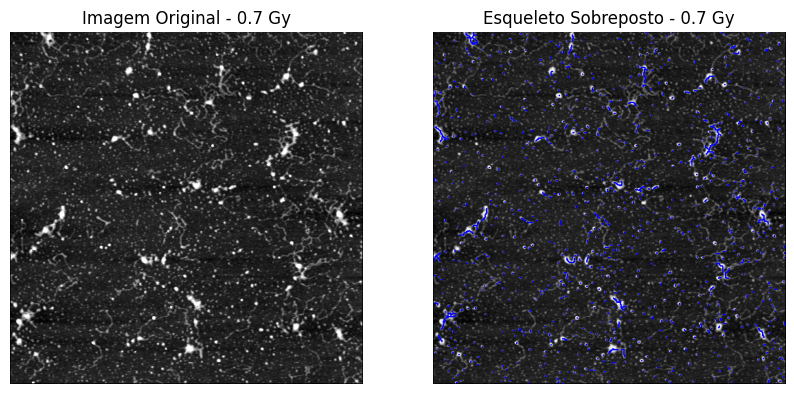

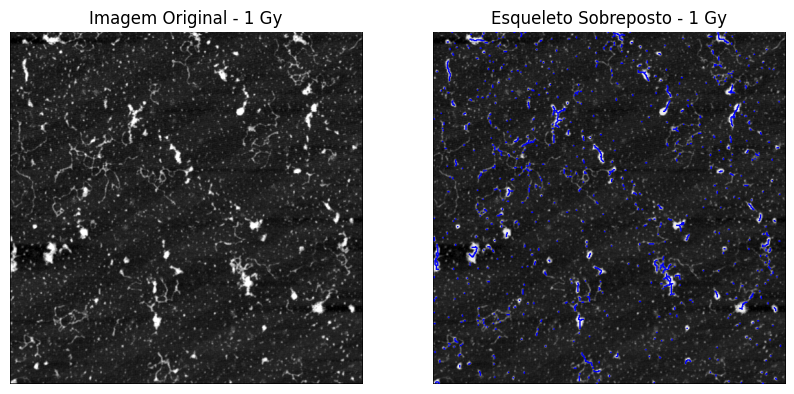

Dose: Sem Irradiar
  Comprimento Esquelético: 32657.04 nm

Dose: 0.4 Gy
  Comprimento Esquelético: 23547.93 nm

Dose: 0.7 Gy
  Comprimento Esquelético: 13276.47 nm

Dose: 1 Gy
  Comprimento Esquelético: 12083.73 nm



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_skeleton(image):
    """ Aplica o algoritmo de thinning para extrair o esqueleto. """
    skeleton = cv2.ximgproc.thinning(image)
    return skeleton

def process_images(image_paths):
    results = []

    for dose, image_path in image_paths.items():
        # Carregar a imagem
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Verificar se a imagem foi carregada corretamente
        if image is None:
            raise FileNotFoundError(f"A imagem no caminho '{image_path}' não foi encontrada.")

        # Obter dimensões da imagem
        height, width = image.shape

        # Definir o fator de conversão com base na resolução
        conversion_factors = {256: 11.72, 258: 11.63, 512: 5.86, 514: 5.79, 1024: 2.93}
        conversion_factor = conversion_factors.get(width, None)
        if conversion_factor is None:
            raise ValueError(f"Resolução {width}x{height} não suportada.")

        # Aplicar binarização para destacar as estruturas
        _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

        # Obter esqueleto da imagem
        skeleton = compute_skeleton(binary_image)

        # 🔹 DILATAR o esqueleto para aumentar a visibilidade 🔹
        kernel = np.ones((2,2), np.uint8)  # Define o tamanho da dilatação
        thick_skeleton = cv2.dilate(skeleton, kernel, iterations=1)

        # Criar imagem colorida para sobrepor o esqueleto
        overlay = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        overlay[thick_skeleton > 0] = [0, 0, 255]  # Define esqueleto como vermelho (BGR)

        # Mostrar imagem original e com esqueleto sobreposto
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Imagem Original - {dose}')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(overlay)
        plt.title(f'Esqueleto Sobreposto - {dose}')
        plt.axis('off')

        plt.show()

        # Medir comprimento do esqueleto
        skeleton_length = np.sum(skeleton > 0) * conversion_factor

        results.append({
            'Dose': dose,
            'Comprimento Esquelético': skeleton_length
        })

    return results

def main():
    image_paths = {
        'Sem Irradiar': '/content/Amostra Test 1_sem irradiar 2023-08-23 08h42m28.png',
        '0.4 Gy': '/content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png',
        '0.7 Gy': '/content/Water Bath 0,7Gy 2023-10-25 14h57m27.png',
        '1 Gy': '/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png'
    }

    results = process_images(image_paths)
    for r in results:
        print(f"Dose: {r['Dose']}")
        print(f"  Comprimento Esquelético: {r['Comprimento Esquelético']:.2f} nm\n")

if __name__ == "__main__":
    main()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_skeleton(image):
    """ Aplica o algoritmo de thinning para extrair o esqueleto. """
    skeleton = cv2.ximgproc.thinning(image)
    return skeleton

def process_images(image_path, dose):
    # Carregar a imagem
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise FileNotFoundError(f"A imagem '{image_path}' não foi encontrada.")

    # 🔹 Suavizar a imagem para reduzir ruído
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # 🔹 Aplicar limiar adaptativo para realçar estruturas
    binary_image = cv2.adaptiveThreshold(
        blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2
    )

    # 🔹 Remover pequenos ruídos usando morfologia
    kernel = np.ones((2,2), np.uint8)
    clean_binary = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

    # 🔹 Gerar esqueleto
    skeleton = compute_skeleton(clean_binary)

    # 🔹 Engrossar o esqueleto para melhor visualização
    thick_skeleton = cv2.dilate(skeleton, kernel, iterations=1)

    # 🔹 Criar uma imagem colorida e sobrepor o esqueleto em vermelho
    overlay = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    overlay[thick_skeleton > 0] = [0, 0, 255]  # Esqueleto vermelho

    # 🔹 Exibir resultados
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Imagem Original - {dose}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(overlay)
    plt.title(f'Esqueleto Sobreposto - {dose}')
    plt.axis('off')

    plt.show()

# 🔹 Função principal
def main():
    image_paths = {
        'Sem Irradiar': '/content/Amostra Test 1_sem irradiar 2023-08-23 08h42m28.png',
        '0.4 Gy': '/content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png',
        '0.7 Gy': '/content/Water Bath 0,7Gy 2023-10-25 14h57m27.png',
        '1 Gy': '/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png'
    }

    for dose, path in image_paths.items():
        print(f"Processando: {dose}")
        process_images(path, dose)

# 🔹 Executa o código apenas se for o script principal
if __name__ == "__main__":
    main()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_skeleton(image):
    """ Aplica o algoritmo de thinning para extrair o esqueleto. """
    skeleton = cv2.ximgproc.thinning(image)
    return skeleton

def calculate_lengths(skeleton):
    """ Calcula os comprimentos dos segmentos do esqueleto. """
    contours, _ = cv2.findContours(skeleton, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    lengths = [cv2.arcLength(cnt, closed=False) for cnt in contours]  # Mede os comprimentos
    return lengths

def process_images(image_path, dose):
    # Carregar a imagem
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise FileNotFoundError(f"A imagem '{image_path}' não foi encontrada.")

    # 🔹 Suavizar e binarizar
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    binary_image = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # 🔹 Remover ruído
    kernel = np.ones((2,2), np.uint8)
    clean_binary = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

    # 🔹 Gerar esqueleto
    skeleton = compute_skeleton(clean_binary)

    # 🔹 Calcular comprimentos dos segmentos do esqueleto
    segment_lengths = calculate_lengths(skeleton)

    # 🔹 Criar imagem com sobreposição do esqueleto
    overlay = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    overlay[skeleton > 0] = [0, 0, 255]  # Esqueleto vermelho

    # 🔹 Exibir imagem e histograma
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Imagem original
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title(f'Imagem Original - {dose}')
    axes[0].axis('off')

    # Esqueleto sobreposto
    axes[1].imshow(overlay)
    axes[1].set_title(f'Esqueleto Sobreposto - {dose}')
    axes[1].axis('off')

    # Histograma de comprimentos
    axes[2].hist(segment_lengths, bins=30, color='blue', edgecolor='black')
    axes[2].set_title(f'Distribuição dos Comprimentos - {dose}')
    axes[2].set_xlabel('Comprimento dos Fragmentos')
    axes[2].set_ylabel('Frequência')

    plt.tight_layout()
    plt.show()

# 🔹 Função principal para processar todas as imagens
def main():
    image_paths = {
        'Sem Irradiar': '/content/Amostra Test 1_sem irradiar 2023-08-23 08h42m28.png',
        '0.4 Gy': '/content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png',
        '0.7 Gy': '/content/Water Bath 0,7Gy 2023-10-25 14h57m27.png',
        '1 Gy': '/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png'
    }

    for dose, path in image_paths.items():
        print(f"Processando: {dose}")
        process_images(path, dose)

# 🔹 Executa o código
if __name__ == "__main__":
    main()


Processando: 0 Gy
Processando: 0.4 Gy
Processando: 0.7 Gy
Processando: 1 Gy


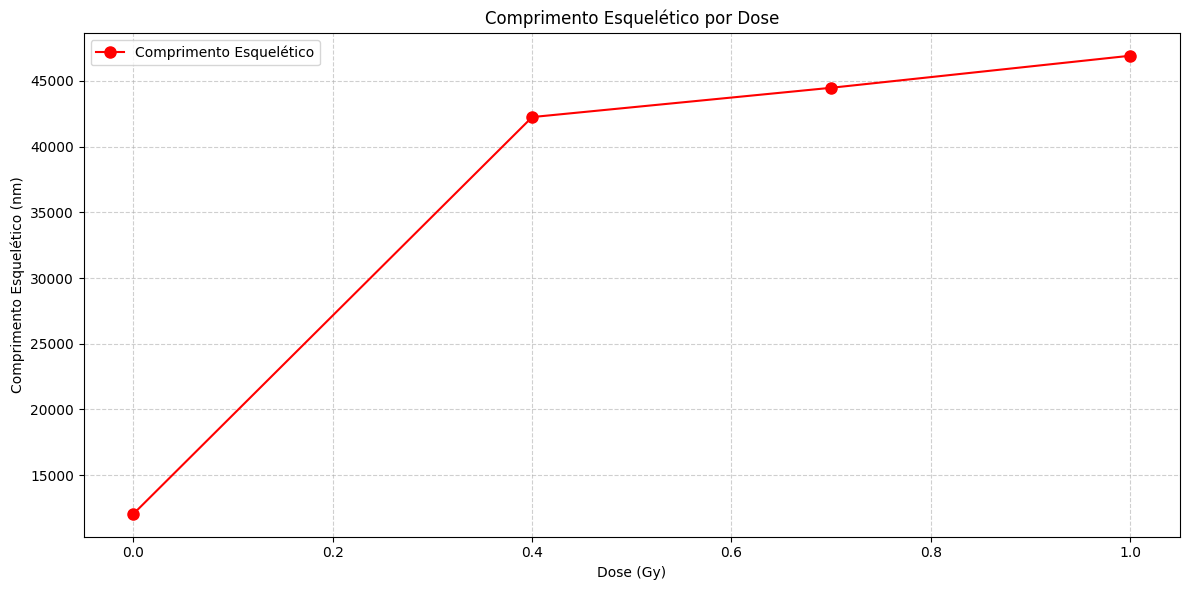

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_skeleton(image):
    """ Aplica o algoritmo de thinning para extrair o esqueleto. """
    skeleton = cv2.ximgproc.thinning(image)
    return skeleton

def calculate_skeleton_length(skeleton):
    """ Calcula o comprimento total do esqueleto. """
    contours, _ = cv2.findContours(skeleton, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    total_length = sum(cv2.arcLength(cnt, closed=False) for cnt in contours)  # Soma dos comprimentos
    return total_length

def process_images(image_path, dose):
    """ Processa a imagem, extrai o esqueleto e calcula seu comprimento. """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise FileNotFoundError(f"A imagem '{image_path}' não foi encontrada.")

    # 🔹 Suavizar e binarizar
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    binary_image = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # 🔹 Remover ruído
    kernel = np.ones((2,2), np.uint8)
    clean_binary = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

    # 🔹 Gerar esqueleto
    skeleton = compute_skeleton(clean_binary)

    # 🔹 Calcular comprimento do esqueleto
    skeleton_length = calculate_skeleton_length(skeleton)

    return {'Dose': dose, 'Comprimento Esquelético': skeleton_length}

def plot_results(results):
    """ Plota o gráfico de Comprimento Esquelético por Dose. """
    doses = [r['Dose'] for r in results]
    skeleton_lengths = [r['Comprimento Esquelético'] for r in results]

    plt.figure(figsize=(12, 6))
    plt.plot(doses, skeleton_lengths, 'o-', label='Comprimento Esquelético', color='red', markersize=8)
    plt.title('Comprimento Esquelético por Dose')
    plt.xlabel('Dose (Gy)')
    plt.ylabel('Comprimento Esquelético (nm)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 🔹 Função principal para processar todas as imagens
def main():
    image_paths = {
        0: '/content/Amostra Test 1_sem irradiar 2023-08-23 08h42m28.png',
        0.4: '/content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png',
        0.7: '/content/Water Bath 0,7Gy 2023-10-25 14h57m27.png',
        1: '/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png'
    }

    results = []
    for dose, path in image_paths.items():
        print(f"Processando: {dose} Gy")
        results.append(process_images(path, dose))

    # 🔹 Plotar gráfico final
    plot_results(results)

# 🔹 Executa o código
if __name__ == "__main__":
    main()


Processando: Sem Irradiar - /content/Amostra Test 1_sem irradiar 2023-08-23 08h42m28.png
Processando: 0.4 Gy - /content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png
Processando: 0.7 Gy - /content/Water Bath 0,7Gy 2023-10-25 14h57m27.png
Processando: 1 Gy - /content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png
Dose: Sem Irradiar, Comprimento Médio: 83875.56 nm
Dose: 0.4 Gy, Comprimento Médio: 171939.84 nm
Dose: 0.7 Gy, Comprimento Médio: 153730.29 nm
Dose: 1 Gy, Comprimento Médio: 174701.67 nm


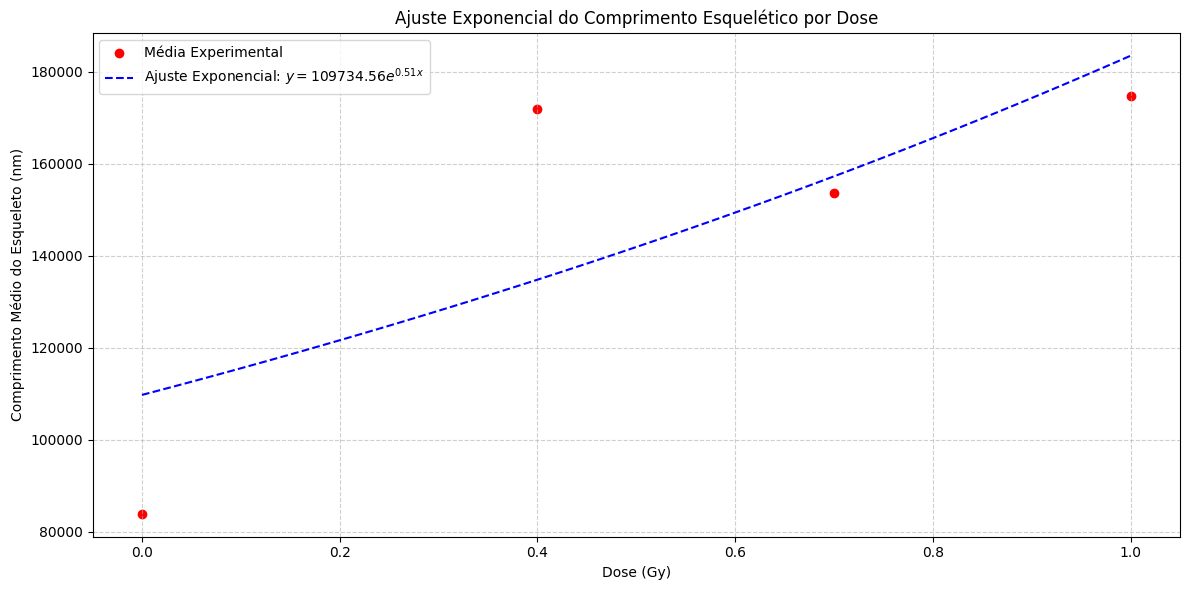

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def compute_skeleton_length(image):
    """ Calcula o comprimento do esqueleto da imagem. """
    skeleton = cv2.ximgproc.thinning(image)  # Reduz para esqueleto de 1 pixel
    return np.sum(skeleton > 0)  # Conta os pixels no esqueleto

def process_images(image_paths):
    """ Processa as imagens e retorna os comprimentos esqueléticos médios por dose. """
    dose_lengths = {}

    for dose, image_list in image_paths.items():
        total_length = 0
        num_images = len(image_list)

        for image_path in image_list:
            print(f"Processando: {dose} - {image_path}")

            # 🔹 Carregar imagem
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                raise FileNotFoundError(f"A imagem '{image_path}' não foi encontrada.")

            # 🔹 Obter dimensões da imagem
            height, width = image.shape

            # 🔹 Definir fator de conversão baseado na resolução
            conversion_factors = {256: 11.72, 258: 11.63, 512: 5.86, 514: 5.79, 1024: 2.93}
            conversion_factor = conversion_factors.get(width, None)
            if conversion_factor is None:
                raise ValueError(f"Resolução {width}x{height} não suportada.")

            # 🔹 Pré-processamento da imagem
            blurred = cv2.GaussianBlur(image, (5, 5), 0)  # Redução de ruído
            binary_image = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                 cv2.THRESH_BINARY, 11, 2)  # Binarização adaptativa

            # 🔹 Remover ruídos pequenos e conectar estruturas
            kernel = np.ones((2, 2), np.uint8)
            clean_binary = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

            # 🔹 Criar esqueleto
            skeleton = cv2.ximgproc.thinning(clean_binary)

            # 🔹 Calcular comprimento do esqueleto e converter para nm
            skeleton_length = compute_skeleton_length(skeleton) * conversion_factor
            total_length += skeleton_length

        # 🔹 Calcular o comprimento médio do esqueleto para essa dose
        mean_length = total_length / num_images
        dose_lengths[dose] = mean_length

    return dose_lengths

def exponential_fit(x, a, b):
    """ Função exponencial para ajuste: f(x) = a * exp(b * x) """
    return a * np.exp(b * x)

def plot_exponential_fit(results):
    """ Plota os dados experimentais e ajusta uma curva exponencial. """
    doses = np.array([float(d.split()[0]) if "Gy" in d else 0 for d in results.keys()])
    lengths = np.array(list(results.values()))

    # 🔹 Ajuste exponencial
    popt, _ = curve_fit(exponential_fit, doses, lengths, p0=(max(lengths), -0.5))

    # 🔹 Criar curva ajustada
    x_fit = np.linspace(min(doses), max(doses), 100)
    y_fit = exponential_fit(x_fit, *popt)

    # 🔹 Plotar dados e ajuste
    plt.figure(figsize=(12, 6))
    plt.scatter(doses, lengths, color='red', label="Média Experimental")
    plt.plot(x_fit, y_fit, 'b--', label=f"Ajuste Exponencial: $y = {popt[0]:.2f} e^{{{popt[1]:.2f}x}}$")
    plt.title("Ajuste Exponencial do Comprimento Esquelético por Dose")
    plt.xlabel("Dose (Gy)")
    plt.ylabel("Comprimento Médio do Esqueleto (nm)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

def main():
    """ Função principal que processa as imagens e gera o gráfico. """
    image_paths = {
        'Sem Irradiar': ['/content/Amostra Test 1_sem irradiar 2023-08-23 08h42m28.png'],
        '0.4 Gy': ['/content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png'],
        '0.7 Gy': ['/content/Water Bath 0,7Gy 2023-10-25 14h57m27.png'],
        '1 Gy': ['/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png']
    }

    results = process_images(image_paths)

    # 🔹 Exibir os resultados
    for dose, length in results.items():
        print(f"Dose: {dose}, Comprimento Médio: {length:.2f} nm")

    # 🔹 Gerar gráfico exponencial
    plot_exponential_fit(results)

if __name__ == "__main__":
    main()


TESTANDO COM TODAS IMAGENS BANHO MARIA (EXCETO 0,4) E 512, imagens do TCC de matheus



Processando imagem: Sem Irradiar...
Processando imagem: 0.4 Gy...
Processando imagem: 0.7 Gy...
Processando imagem: 1 Gy...
Dose: Sem Irradiar, Comprimento Esquelético: 208057.86 nm
Dose: 0.4 Gy, Comprimento Esquelético: 203072.67 nm
Dose: 0.7 Gy, Comprimento Esquelético: 184289.91 nm
Dose: 1 Gy, Comprimento Esquelético: 211873.47 nm


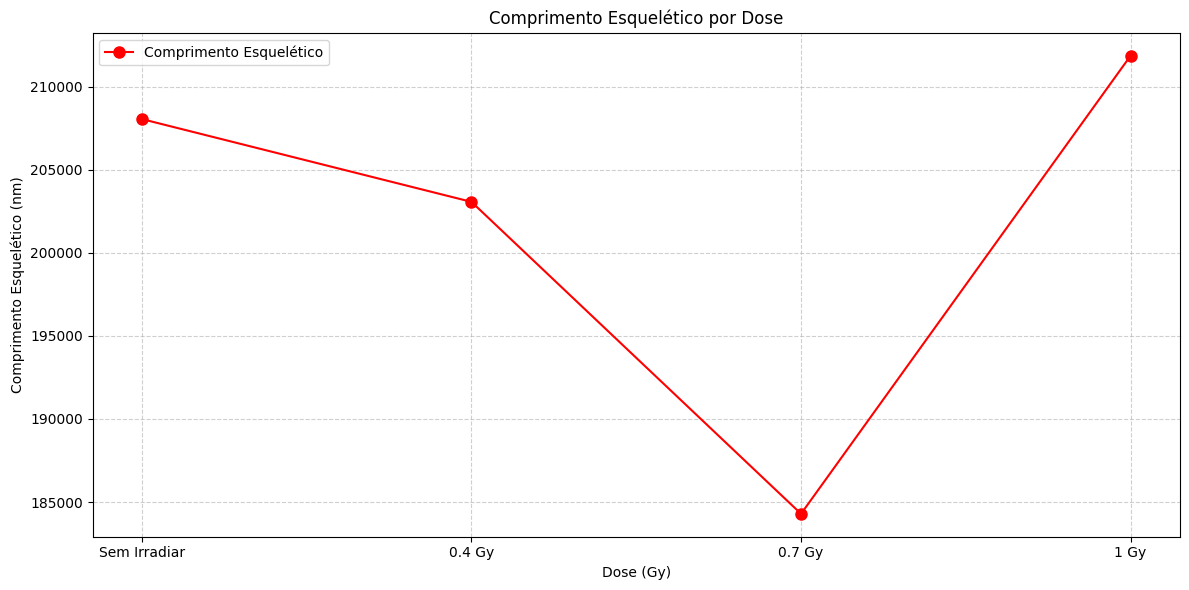

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_skeleton_length(image):
    """ Calcula o comprimento do esqueleto da imagem. """
    skeleton = cv2.ximgproc.thinning(image)  # Reduz para esqueleto de 1 pixel
    return np.sum(skeleton > 0)  # Conta os pixels no esqueleto

def process_images(image_paths):
    results = []

    for dose, image_path in image_paths.items():
        print(f"Processando imagem: {dose}...")

        # 🔹 Carregar imagem em escala de cinza
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise FileNotFoundError(f"A imagem '{image_path}' não foi encontrada.")

        # 🔹 Obter dimensões da imagem
        height, width = image.shape

        # 🔹 Definir fator de conversão baseado na resolução
        conversion_factors = {256: 11.72, 258: 11.63, 512: 5.86, 514: 5.79, 1024: 2.93}
        conversion_factor = conversion_factors.get(width, None)
        if conversion_factor is None:
            raise ValueError(f"Resolução {width}x{height} não suportada.")

        # 🔹 Aplicar pré-processamento para melhorar o esqueleto
        blurred = cv2.GaussianBlur(image, (5, 5), 0)  # Redução de ruído
        binary_image = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                             cv2.THRESH_BINARY, 11, 2)  # Binarização adaptativa

        # 🔹 Remover pequenos ruídos e conectar estruturas
        kernel = np.ones((1, 1), np.uint8)
        clean_binary = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

        # 🔹 Gerar esqueleto
        skeleton = cv2.ximgproc.thinning(clean_binary)

        # 🔹 Calcular comprimento do esqueleto
        skeleton_length = compute_skeleton_length(skeleton) * conversion_factor  # Convertendo para nm

        results.append({
            'Dose': dose,
            'Comprimento Esquelético': skeleton_length
        })

    return results

def plot_results(results):
    """ Plota o gráfico de Comprimento Esquelético por Dose. """
    doses = [r['Dose'] for r in results]
    skeleton_lengths = [r['Comprimento Esquelético'] for r in results]

    plt.figure(figsize=(12, 6))
    plt.plot(doses, skeleton_lengths, 'o-', label='Comprimento Esquelético', color='red', markersize=8)
    plt.title('Comprimento Esquelético por Dose')
    plt.xlabel('Dose (Gy)')
    plt.ylabel('Comprimento Esquelético (nm)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    image_paths = {
        'Sem Irradiar': '/content/3min_water bath 2023-10-26 14h43m01.png',
        '0.4 Gy': '/content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png',
        '0.7 Gy': '/content/Water Bath 0,7Gy 2023-10-25 14h57m27.png',
        '1 Gy': '/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png'
    }

    results = process_images(image_paths)

    # 🔹 Exibir resultados no terminal
    for r in results:
        print(f"Dose: {r['Dose']}, Comprimento Esquelético: {r['Comprimento Esquelético']:.2f} nm")

    # 🔹 Gerar gráfico
    plot_results(results)

if __name__ == "__main__":
    main()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_skeleton(image):
    """ Aplica o algoritmo de thinning para extrair o esqueleto. """
    skeleton = cv2.ximgproc.thinning(image)
    return skeleton

def process_images(image_path, dose):
    # Carregar a imagem
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise FileNotFoundError(f"A imagem '{image_path}' não foi encontrada.")

    # 🔹 Suavizar a imagem para reduzir ruído
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # 🔹 Aplicar limiar adaptativo para realçar estruturas
    binary_image = cv2.adaptiveThreshold(
        blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2
    )

    # 🔹 Remover pequenos ruídos usando morfologia
    kernel = np.ones((2,2), np.uint8)
    clean_binary = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

    # 🔹 Gerar esqueleto
    skeleton = compute_skeleton(clean_binary)

    # 🔹 Engrossar o esqueleto para melhor visualização
    thick_skeleton = cv2.dilate(skeleton, kernel, iterations=1)

    # 🔹 Criar uma imagem colorida e sobrepor o esqueleto em vermelho
    overlay = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    overlay[thick_skeleton > 0] = [0, 0, 255]  # Esqueleto vermelho

    # 🔹 Exibir resultados
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Imagem Original - {dose}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(overlay)
    plt.title(f'Esqueleto Sobreposto - {dose}')
    plt.axis('off')

    plt.show()

# 🔹 Função principal
def main():
    image_paths = {
        'Sem Irradiar': '/content/3min_water bath 2023-10-26 14h43m01.png',
        '0.4 Gy': '/content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png',
        '0.7 Gy': '/content/Water Bath 0,7Gy 2023-10-25 14h57m27.png',
        '1 Gy': '/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png'
    }

    for dose, path in image_paths.items():
        print(f"Processando: {dose}")
        process_images(path, dose)

# 🔹 Executa o código apenas se for o script principal
if __name__ == "__main__":
    main()

Processando: 0 Gy
Processando: 0.4 Gy
Processando: 0.7 Gy
Processando: 1 Gy


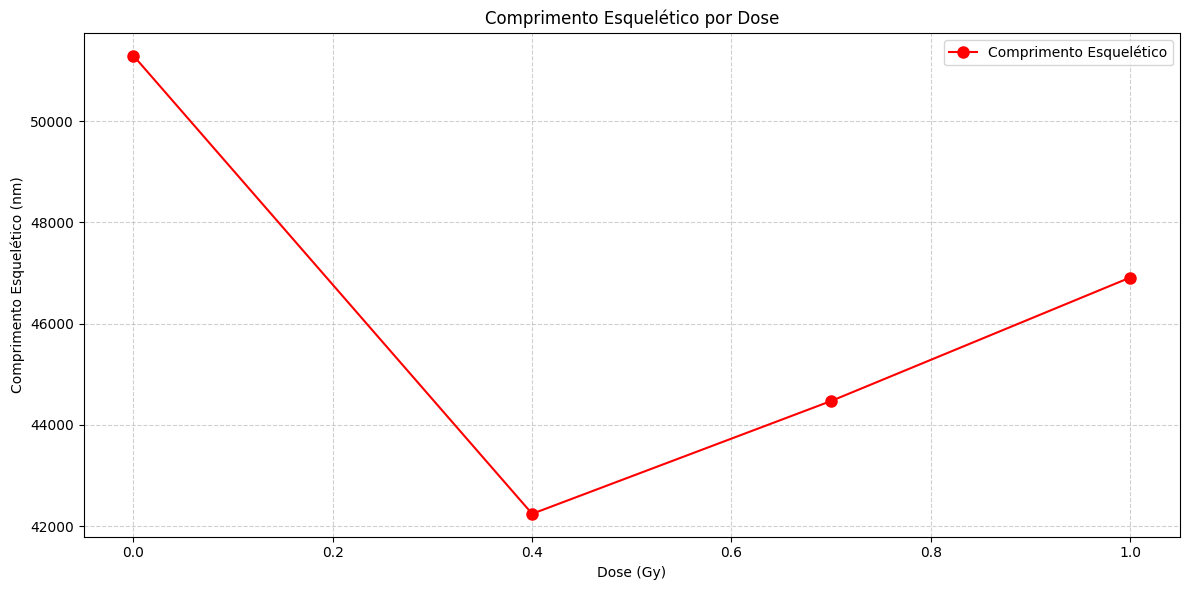

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_skeleton(image):
    """ Aplica o algoritmo de thinning para extrair o esqueleto. """
    skeleton = cv2.ximgproc.thinning(image)
    return skeleton

def calculate_skeleton_length(skeleton):
    """ Calcula o comprimento total do esqueleto. """
    contours, _ = cv2.findContours(skeleton, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    total_length = sum(cv2.arcLength(cnt, closed=False) for cnt in contours)  # Soma dos comprimentos
    return total_length

def process_images(image_path, dose):
    """ Processa a imagem, extrai o esqueleto e calcula seu comprimento. """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise FileNotFoundError(f"A imagem '{image_path}' não foi encontrada.")

    # 🔹 Suavizar e binarizar
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    binary_image = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # 🔹 Remover ruído
    kernel = np.ones((2,2), np.uint8)
    clean_binary = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

    # 🔹 Gerar esqueleto
    skeleton = compute_skeleton(clean_binary)

    # 🔹 Calcular comprimento do esqueleto
    skeleton_length = calculate_skeleton_length(skeleton)

    return {'Dose': dose, 'Comprimento Esquelético': skeleton_length}

def plot_results(results):
    """ Plota o gráfico de Comprimento Esquelético por Dose. """
    doses = [r['Dose'] for r in results]
    skeleton_lengths = [r['Comprimento Esquelético'] for r in results]

    plt.figure(figsize=(12, 6))
    plt.plot(doses, skeleton_lengths, 'o-', label='Comprimento Esquelético', color='red', markersize=8)
    plt.title('Comprimento Esquelético por Dose')
    plt.xlabel('Dose (Gy)')
    plt.ylabel('Comprimento Esquelético (nm)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 🔹 Função principal para processar todas as imagens
def main():
    image_paths = {
        0: '/content/3min_water bath 2023-10-26 14h43m01.png',
        0.4: '/content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png',
        0.7: '/content/Water Bath 0,7Gy 2023-10-25 14h57m27.png',
        1: '/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png'
    }

    results = []
    for dose, path in image_paths.items():
        print(f"Processando: {dose} Gy")
        results.append(process_images(path, dose))

    # 🔹 Plotar gráfico final
    plot_results(results)

# 🔹 Executa o código
if __name__ == "__main__":
    main()

Processando: Sem Irradiar - /content/3min_water bath 2023-10-26 14h43m01.png
Processando: 0.4 Gy - /content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png
Processando: 0.7 Gy - /content/Water Bath 0,7Gy 2023-10-25 14h57m27.png
Processando: 1 Gy - /content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png
Dose: Sem Irradiar, Comprimento Médio: 177695.10 nm
Dose: 0.4 Gy, Comprimento Médio: 171939.84 nm
Dose: 0.7 Gy, Comprimento Médio: 153730.29 nm
Dose: 1 Gy, Comprimento Médio: 174701.67 nm


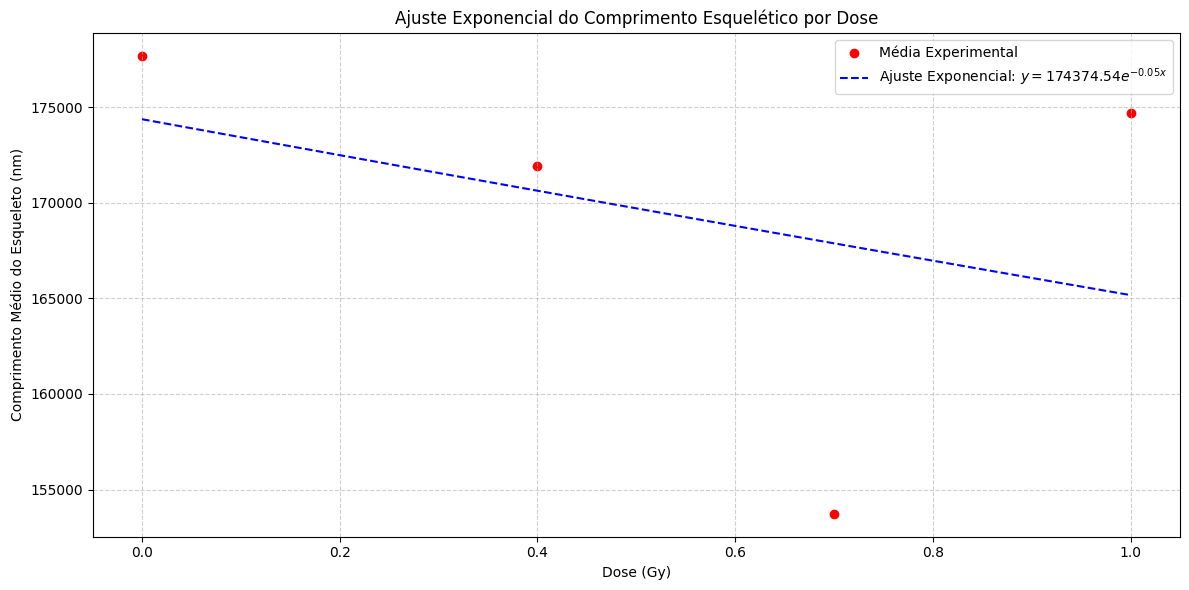

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def compute_skeleton_length(image):
    """ Calcula o comprimento do esqueleto da imagem. """
    skeleton = cv2.ximgproc.thinning(image)  # Reduz para esqueleto de 1 pixel
    return np.sum(skeleton > 0)  # Conta os pixels no esqueleto

def process_images(image_paths):
    """ Processa as imagens e retorna os comprimentos esqueléticos médios por dose. """
    dose_lengths = {}

    for dose, image_list in image_paths.items():
        total_length = 0
        num_images = len(image_list)

        for image_path in image_list:
            print(f"Processando: {dose} - {image_path}")

            # 🔹 Carregar imagem
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                raise FileNotFoundError(f"A imagem '{image_path}' não foi encontrada.")

            # 🔹 Obter dimensões da imagem
            height, width = image.shape

            # 🔹 Definir fator de conversão baseado na resolução
            conversion_factors = {256: 11.72, 258: 11.63, 512: 5.86, 514: 5.79, 1024: 2.93}
            conversion_factor = conversion_factors.get(width, None)
            if conversion_factor is None:
                raise ValueError(f"Resolução {width}x{height} não suportada.")

            # 🔹 Pré-processamento da imagem
            blurred = cv2.GaussianBlur(image, (5, 5), 0)  # Redução de ruído
            binary_image = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                 cv2.THRESH_BINARY, 11, 2)  # Binarização adaptativa

            # 🔹 Remover ruídos pequenos e conectar estruturas
            kernel = np.ones((2, 2), np.uint8)
            clean_binary = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

            # 🔹 Criar esqueleto
            skeleton = cv2.ximgproc.thinning(clean_binary)

            # 🔹 Calcular comprimento do esqueleto e converter para nm
            skeleton_length = compute_skeleton_length(skeleton) * conversion_factor
            total_length += skeleton_length

        # 🔹 Calcular o comprimento médio do esqueleto para essa dose
        mean_length = total_length / num_images
        dose_lengths[dose] = mean_length

    return dose_lengths

def exponential_fit(x, a, b):
    """ Função exponencial para ajuste: f(x) = a * exp(b * x) """
    return a * np.exp(b * x)

def plot_exponential_fit(results):
    """ Plota os dados experimentais e ajusta uma curva exponencial. """
    doses = np.array([float(d.split()[0]) if "Gy" in d else 0 for d in results.keys()])
    lengths = np.array(list(results.values()))

    # 🔹 Ajuste exponencial
    popt, _ = curve_fit(exponential_fit, doses, lengths, p0=(max(lengths), -0.5))

    # 🔹 Criar curva ajustada
    x_fit = np.linspace(min(doses), max(doses), 100)
    y_fit = exponential_fit(x_fit, *popt)

    # 🔹 Plotar dados e ajuste
    plt.figure(figsize=(12, 6))
    plt.scatter(doses, lengths, color='red', label="Média Experimental")
    plt.plot(x_fit, y_fit, 'b--', label=f"Ajuste Exponencial: $y = {popt[0]:.2f} e^{{{popt[1]:.2f}x}}$")
    plt.title("Ajuste Exponencial do Comprimento Esquelético por Dose")
    plt.xlabel("Dose (Gy)")
    plt.ylabel("Comprimento Médio do Esqueleto (nm)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

def main():
    """ Função principal que processa as imagens e gera o gráfico. """
    image_paths = {
        'Sem Irradiar': ['/content/3min_water bath 2023-10-26 14h43m01.png'],
        '0.4 Gy': ['/content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png'],
        '0.7 Gy': ['/content/Water Bath 0,7Gy 2023-10-25 14h57m27.png'],
        '1 Gy': ['/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png']
    }

    results = process_images(image_paths)

    # 🔹 Exibir os resultados
    for dose, length in results.items():
        print(f"Dose: {dose}, Comprimento Médio: {length:.2f} nm")

    # 🔹 Gerar gráfico exponencial
    plot_exponential_fit(results)

if __name__ == "__main__":
    main()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_skeleton(image):
    """ Aplica o algoritmo de thinning para extrair o esqueleto. """
    skeleton = cv2.ximgproc.thinning(image)
    return skeleton

def calculate_lengths(skeleton):
    """ Calcula os comprimentos dos segmentos do esqueleto. """
    contours, _ = cv2.findContours(skeleton, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    lengths = [cv2.arcLength(cnt, closed=False) for cnt in contours]  # Mede os comprimentos
    return lengths

def process_images(image_path, dose):
    # Carregar a imagem
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise FileNotFoundError(f"A imagem '{image_path}' não foi encontrada.")

    # 🔹 Suavizar e binarizar
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    binary_image = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # 🔹 Remover ruído
    kernel = np.ones((2,2), np.uint8)
    clean_binary = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

    # 🔹 Gerar esqueleto
    skeleton = compute_skeleton(clean_binary)

    # 🔹 Calcular comprimentos dos segmentos do esqueleto
    segment_lengths = calculate_lengths(skeleton)

    # 🔹 Criar imagem com sobreposição do esqueleto
    overlay = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    overlay[skeleton > 0] = [0, 0, 255]  # Esqueleto vermelho

    # 🔹 Exibir imagem e histograma
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Imagem original
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title(f'Imagem Original - {dose}')
    axes[0].axis('off')

    # Esqueleto sobreposto
    axes[1].imshow(overlay)
    axes[1].set_title(f'Esqueleto Sobreposto - {dose}')
    axes[1].axis('off')

    # Histograma de comprimentos
    axes[2].hist(segment_lengths, bins=30, color='blue', edgecolor='black')
    axes[2].set_title(f'Distribuição dos Comprimentos - {dose}')
    axes[2].set_xlabel('Comprimento dos Fragmentos')
    axes[2].set_ylabel('Frequência')

    plt.tight_layout()
    plt.show()

# 🔹 Função principal para processar todas as imagens
def main():
    image_paths = {
        'Sem Irradiar': '/content/3min_water bath 2023-10-26 14h43m01.png',
        '0.4 Gy': '/content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png',
        '0.7 Gy': '/content/Water Bath 0,7Gy 2023-10-25 14h57m27.png',
        '1 Gy': '/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png'
    }

    for dose, path in image_paths.items():
        print(f"Processando: {dose}")
        process_images(path, dose)

# 🔹 Executa o código
if __name__ == "__main__":
    main()

TESTANDO TODAS IMAGENS C 3X3, 512, SEM IRRADIAR SENDO BANHO **MARIA**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_skeleton(image):
    """ Aplica o algoritmo de thinning para extrair o esqueleto. """
    skeleton = cv2.ximgproc.thinning(image)
    return skeleton

def calculate_lengths(skeleton):
    """ Calcula os comprimentos dos segmentos do esqueleto. """
    contours, _ = cv2.findContours(skeleton, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    lengths = [cv2.arcLength(cnt, closed=False) for cnt in contours]  # Mede os comprimentos
    return lengths

def process_images(image_path, dose):
    # Carregar a imagem
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise FileNotFoundError(f"A imagem '{image_path}' não foi encontrada.")

    # 🔹 Suavizar e binarizar
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    binary_image = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # 🔹 Remover ruído
    kernel = np.ones((2,2), np.uint8)
    clean_binary = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

    # 🔹 Gerar esqueleto
    skeleton = compute_skeleton(clean_binary)

    # 🔹 Calcular comprimentos dos segmentos do esqueleto
    segment_lengths = calculate_lengths(skeleton)

    # 🔹 Criar imagem com sobreposição do esqueleto
    overlay = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    overlay[skeleton > 0] = [0, 0, 255]  # Esqueleto vermelho

    # 🔹 Exibir imagem e histograma
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Imagem original
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title(f'Imagem Original - {dose}')
    axes[0].axis('off')

    # Esqueleto sobreposto
    axes[1].imshow(overlay)
    axes[1].set_title(f'Esqueleto Sobreposto - {dose}')
    axes[1].axis('off')

    # Histograma de comprimentos
    axes[2].hist(segment_lengths, bins=30, color='blue', edgecolor='black')
    axes[2].set_title(f'Distribuição dos Comprimentos - {dose}')
    axes[2].set_xlabel('Comprimento dos Fragmentos')
    axes[2].set_ylabel('Frequência')

    plt.tight_layout()
    plt.show()

# 🔹 Função principal para processar todas as imagens
def main():
    image_paths = {
        'Sem Irradiar': '/content/3min_water bath 2023-10-26 14h43m01.png',
        '0.4 Gy': '/content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png',
        '0.7 Gy': '/content/Amostrairradiada_02_0,7Gy_3x3.png',
        '1 Gy': '/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png'
    }

    for dose, path in image_paths.items():
        print(f"Processando: {dose}")
        process_images(path, dose)

# 🔹 Executa o código
if __name__ == "__main__":
    main()

Processando imagem: Sem Irradiar...
Processando imagem: 0.4 Gy...
Processando imagem: 0.7 Gy...
Processando imagem: 1 Gy...
Dose: Sem Irradiar, Comprimento Esquelético: 208057.86 nm
Dose: 0.4 Gy, Comprimento Esquelético: 203072.67 nm
Dose: 0.7 Gy, Comprimento Esquelético: 242890.50 nm
Dose: 1 Gy, Comprimento Esquelético: 211873.47 nm


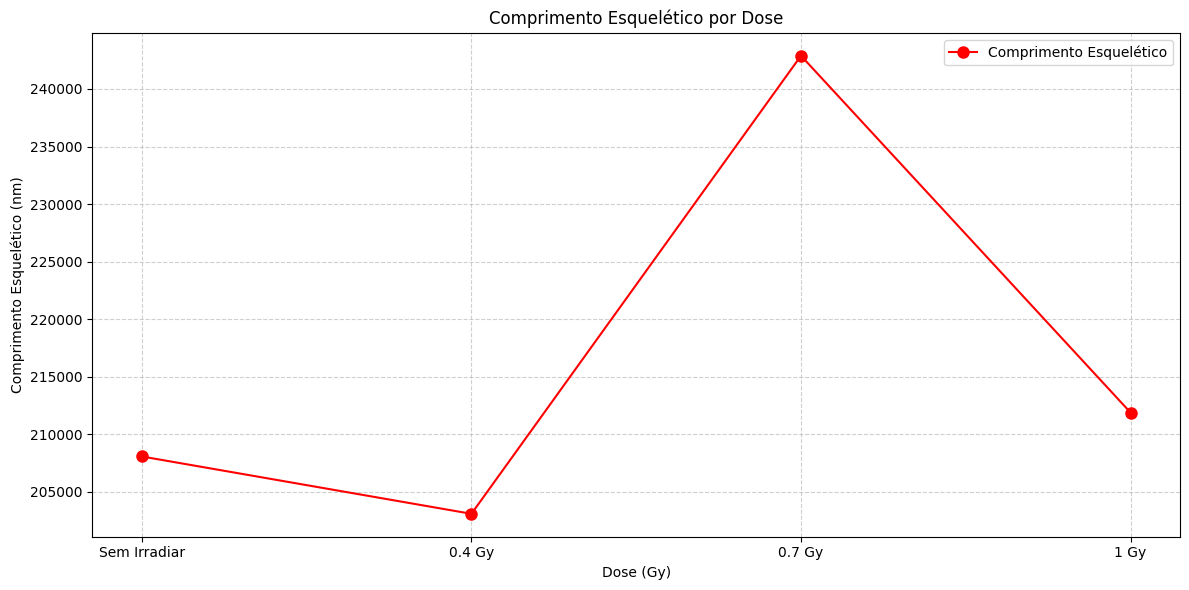

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_skeleton_length(image):
    """ Calcula o comprimento do esqueleto da imagem. """
    skeleton = cv2.ximgproc.thinning(image)  # Reduz para esqueleto de 1 pixel
    return np.sum(skeleton > 0)  # Conta os pixels no esqueleto

def process_images(image_paths):
    results = []

    for dose, image_path in image_paths.items():
        print(f"Processando imagem: {dose}...")

        # 🔹 Carregar imagem em escala de cinza
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise FileNotFoundError(f"A imagem '{image_path}' não foi encontrada.")

        # 🔹 Obter dimensões da imagem
        height, width = image.shape

        # 🔹 Definir fator de conversão baseado na resolução
        conversion_factors = {256: 11.72, 258: 11.63, 512: 5.86, 514: 5.79, 1024: 2.93}
        conversion_factor = conversion_factors.get(width, None)
        if conversion_factor is None:
            raise ValueError(f"Resolução {width}x{height} não suportada.")

        # 🔹 Aplicar pré-processamento para melhorar o esqueleto
        blurred = cv2.GaussianBlur(image, (5, 5), 0)  # Redução de ruído
        binary_image = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                             cv2.THRESH_BINARY, 11, 2)  # Binarização adaptativa

        # 🔹 Remover pequenos ruídos e conectar estruturas
        kernel = np.ones((1, 1), np.uint8)
        clean_binary = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

        # 🔹 Gerar esqueleto
        skeleton = cv2.ximgproc.thinning(clean_binary)

        # 🔹 Calcular comprimento do esqueleto
        skeleton_length = compute_skeleton_length(skeleton) * conversion_factor  # Convertendo para nm

        results.append({
            'Dose': dose,
            'Comprimento Esquelético': skeleton_length
        })

    return results

def plot_results(results):
    """ Plota o gráfico de Comprimento Esquelético por Dose. """
    doses = [r['Dose'] for r in results]
    skeleton_lengths = [r['Comprimento Esquelético'] for r in results]

    plt.figure(figsize=(12, 6))
    plt.plot(doses, skeleton_lengths, 'o-', label='Comprimento Esquelético', color='red', markersize=8)
    plt.title('Comprimento Esquelético por Dose')
    plt.xlabel('Dose (Gy)')
    plt.ylabel('Comprimento Esquelético (nm)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    image_paths = {
        'Sem Irradiar': '/content/3min_water bath 2023-10-26 14h43m01.png',
        '0.4 Gy': '/content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png',
        '0.7 Gy': '/content/Amostrairradiada_02_0,7Gy_3x3.png',
        '1 Gy': '/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png'
    }

    results = process_images(image_paths)

    # 🔹 Exibir resultados no terminal
    for r in results:
        print(f"Dose: {r['Dose']}, Comprimento Esquelético: {r['Comprimento Esquelético']:.2f} nm")

    # 🔹 Gerar gráfico
    plot_results(results)

if __name__ == "__main__":
    main()

Processando: 0 Gy
Processando: 0.4 Gy
Processando: 0.7 Gy
Processando: 1 Gy


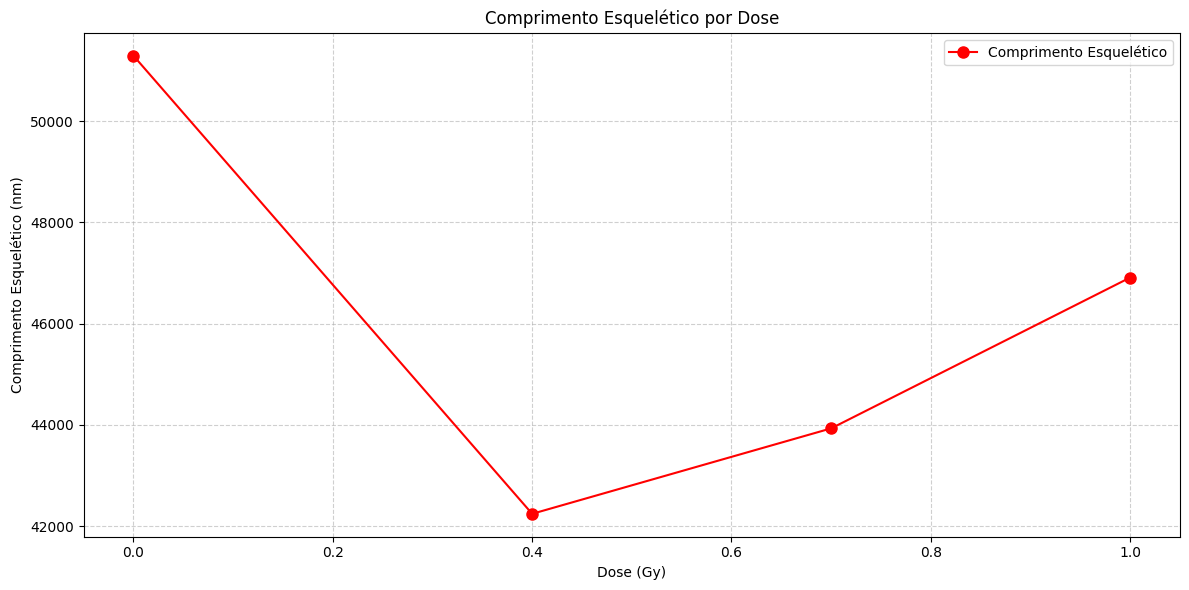

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_skeleton(image):
    """ Aplica o algoritmo de thinning para extrair o esqueleto. """
    skeleton = cv2.ximgproc.thinning(image)
    return skeleton

def calculate_skeleton_length(skeleton):
    """ Calcula o comprimento total do esqueleto. """
    contours, _ = cv2.findContours(skeleton, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    total_length = sum(cv2.arcLength(cnt, closed=False) for cnt in contours)  # Soma dos comprimentos
    return total_length

def process_images(image_path, dose):
    """ Processa a imagem, extrai o esqueleto e calcula seu comprimento. """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise FileNotFoundError(f"A imagem '{image_path}' não foi encontrada.")

    # 🔹 Suavizar e binarizar
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    binary_image = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # 🔹 Remover ruído
    kernel = np.ones((2,2), np.uint8)
    clean_binary = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

    # 🔹 Gerar esqueleto
    skeleton = compute_skeleton(clean_binary)

    # 🔹 Calcular comprimento do esqueleto
    skeleton_length = calculate_skeleton_length(skeleton)

    return {'Dose': dose, 'Comprimento Esquelético': skeleton_length}

def plot_results(results):
    """ Plota o gráfico de Comprimento Esquelético por Dose. """
    doses = [r['Dose'] for r in results]
    skeleton_lengths = [r['Comprimento Esquelético'] for r in results]

    plt.figure(figsize=(12, 6))
    plt.plot(doses, skeleton_lengths, 'o-', label='Comprimento Esquelético', color='red', markersize=8)
    plt.title('Comprimento Esquelético por Dose')
    plt.xlabel('Dose (Gy)')
    plt.ylabel('Comprimento Esquelético (nm)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 🔹 Função principal para processar todas as imagens
def main():
    image_paths = {
        0: '/content/3min_water bath 2023-10-26 14h43m01.png',
        0.4: '/content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png',
        0.7: '/content/Amostrairradiada_02_0,7Gy_3x3.png',
        1: '/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png'
    }

    results = []
    for dose, path in image_paths.items():
        print(f"Processando: {dose} Gy")
        results.append(process_images(path, dose))

    # 🔹 Plotar gráfico final
    plot_results(results)

# 🔹 Executa o código
if __name__ == "__main__":
    main()

Dose: Sem Irradiar
  RNA Fragmentos: 44, RNA Perímetro: 378.35
  DNA Fragmentos: 2013, DNA Perímetro: 96459.71

Dose: 0.4 Gy
  RNA Fragmentos: 7, RNA Perímetro: 56.14
  DNA Fragmentos: 1658, DNA Perímetro: 105028.70

Dose: 0.7 Gy
  RNA Fragmentos: 35, RNA Perímetro: 486.74
  DNA Fragmentos: 1193, DNA Perímetro: 35743.16

Dose: 1 Gy
  RNA Fragmentos: 148, RNA Perímetro: 1484.69
  DNA Fragmentos: 1713, DNA Perímetro: 35909.87



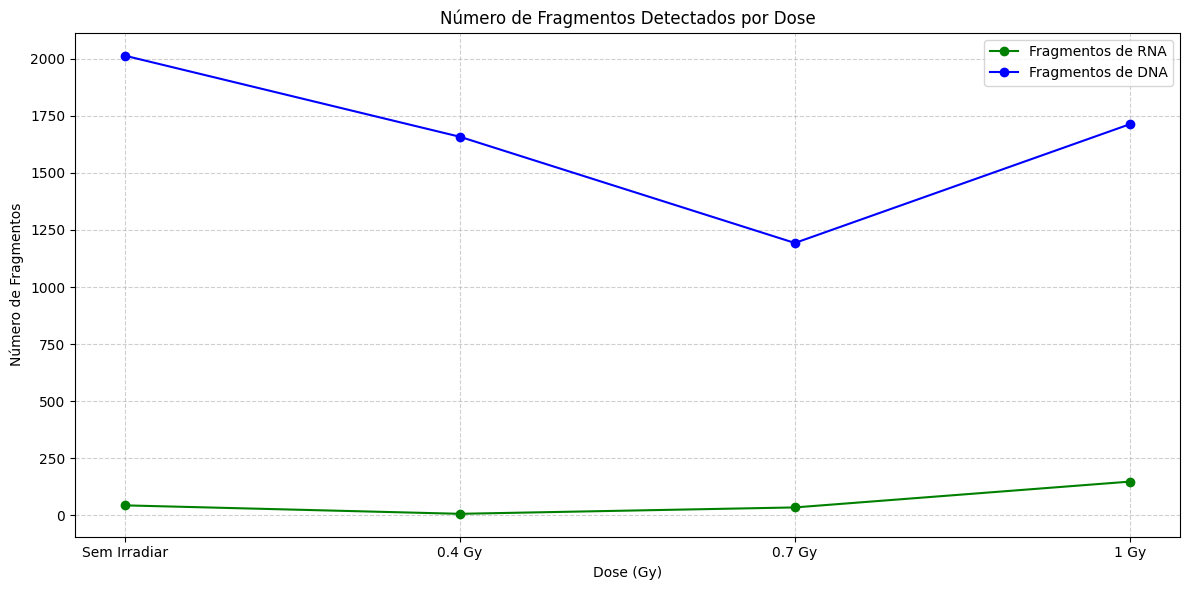

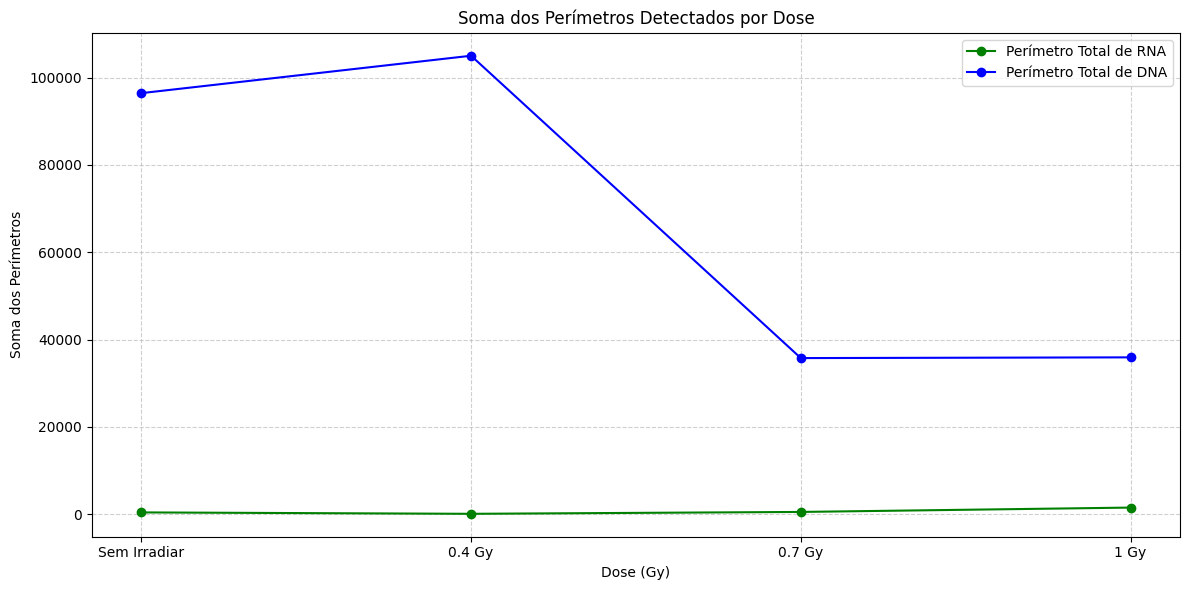

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_images(image_paths):
    results = []

    for dose, image_path in image_paths.items():
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise FileNotFoundError(f"Imagem não encontrada: {image_path}")

        edges = cv2.Canny(image, 100, 200)
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        dna_perimeters, rna_perimeters = [], []

        for contour in contours:
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)
            if perimeter == 0:
                continue

            circularity = 4 * np.pi * (area / (perimeter ** 2))
            if circularity > 0.8:
                rna_perimeters.append(perimeter)
            else:
                dna_perimeters.append(perimeter)

        results.append({
            'Dose': dose,
            'Num RNA': len(rna_perimeters),
            'Perímetro RNA': sum(rna_perimeters),
            'Num DNA': len(dna_perimeters),
            'Perímetro DNA': sum(dna_perimeters)
        })

    return results

def plot_results(results):
    doses = [r['Dose'] for r in results]
    rna_fragments = [r['Num RNA'] for r in results]
    dna_fragments = [r['Num DNA'] for r in results]
    rna_perimeters = [r['Perímetro RNA'] for r in results]
    dna_perimeters = [r['Perímetro DNA'] for r in results]

    plt.figure(figsize=(12, 6))
    plt.plot(doses, rna_fragments, 'o-', label='Fragmentos de RNA', color='green')
    plt.plot(doses, dna_fragments, 'o-', label='Fragmentos de DNA', color='blue')
    plt.title('Número de Fragmentos Detectados por Dose')
    plt.xlabel('Dose (Gy)')
    plt.ylabel('Número de Fragmentos')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(doses, rna_perimeters, 'o-', label='Perímetro Total de RNA', color='green')
    plt.plot(doses, dna_perimeters, 'o-', label='Perímetro Total de DNA', color='blue')
    plt.title('Soma dos Perímetros Detectados por Dose')
    plt.xlabel('Dose (Gy)')
    plt.ylabel('Soma dos Perímetros')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    image_paths = {
    'Sem Irradiar': '/content/3min_water bath 2023-10-26 14h43m01.png',
    '0.4 Gy': '/content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png',
    '0.7 Gy': '/content/Amostrairradiada_02_0,7Gy_3x3.png',
    '1 Gy': '/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png'
    }

    results = process_images(image_paths)
    for r in results:
        print(f"Dose: {r['Dose']}")
        print(f"  RNA Fragmentos: {r['Num RNA']}, RNA Perímetro: {r['Perímetro RNA']:.2f}")
        print(f"  DNA Fragmentos: {r['Num DNA']}, DNA Perímetro: {r['Perímetro DNA']:.2f}\n")

    plot_results(results)

if __name__ == "__main__":
    main()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Lista de imagens e doses correspondentes
image_paths = {
    'Sem Irradiar': '/content/3min_water bath 2023-10-26 14h43m01.png',
    '0.4 Gy': '/content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png',
    '0.7 Gy': '/content/Amostrairradiada_02_0,7Gy_3x3.png',
    '1 Gy': '/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png'
}

# Estruturas para armazenar os resultados
results = []

for dose, image_path in image_paths.items():
    # Carregar a imagem
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Verificar se a imagem foi carregada corretamente
    if image is None:
        raise FileNotFoundError(f"A imagem no caminho '{image_path}' não foi encontrada ou está vazia. Verifique o caminho e tente novamente.")

    # Aplicar o filtro Canny para detectar bordas
    edges = cv2.Canny(image, 100, 200)

    # Encontrar os contornos com base no resultado do filtro Canny
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Inicializar variáveis para DNA e RNA
    dna_perimeters = []
    rna_perimeters = []

    # Processar cada contorno
    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        if perimeter == 0:
            continue

        # Calcular circularidade
        circularity = 4 * np.pi * (area / (perimeter ** 2))

        # Classificar como RNA (bolinhas) ou DNA com base na circularidade
        if circularity > 0.8:  # Critério para alta circularidade (RNA)
            rna_perimeters.append(perimeter)
        else:
            dna_perimeters.append(perimeter)

    # Soma dos perímetros
    total_rna_perimeter = sum(rna_perimeters)
    total_dna_perimeter = sum(dna_perimeters)

    # Número de fragmentos detectados
    num_rna_fragments = len(rna_perimeters)
    num_dna_fragments = len(dna_perimeters)

    # Armazenar os resultados
    results.append({
        'Dose': dose,
        'Num RNA': num_rna_fragments,
        'Perímetro RNA': total_rna_perimeter,
        'Num DNA': num_dna_fragments,
        'Perímetro DNA': total_dna_perimeter
    })

    # Opcional: Exibir a imagem com bordas e contornos classificados
    dna_image = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    rna_image = dna_image.copy()

    cv2.drawContours(dna_image, [c for c in contours if cv2.arcLength(c, True) not in rna_perimeters], -1, (255, 0, 0), 1)
    cv2.drawContours(rna_image, [c for c in contours if cv2.arcLength(c, True) in rna_perimeters], -1, (0, 255, 0), 1)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(dna_image, cv2.COLOR_BGR2RGB))
    plt.title(f'DNA - {dose}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(rna_image, cv2.COLOR_BGR2RGB))
    plt.title(f'RNA - {dose}')
    plt.axis('off')
    plt.show()

# Exibir resultados
print("Resultados:")
for result in results:
    print(f"Dose: {result['Dose']}")
    print(f"  Número de fragmentos de RNA detectados: {result['Num RNA']}")
    print(f"  Soma total dos perímetros de RNA: {result['Perímetro RNA']:.2f}")
    print(f"  Número de fragmentos de DNA detectados: {result['Num DNA']}")
    print(f"  Soma total dos perímetros de DNA: {result['Perímetro DNA']:.2f}")

TESTANDO SEM IRRADIAR SEM BANHO MARIA

Processando: 0 Gy
Processando: 0.4 Gy
Processando: 0.7 Gy
Processando: 1 Gy


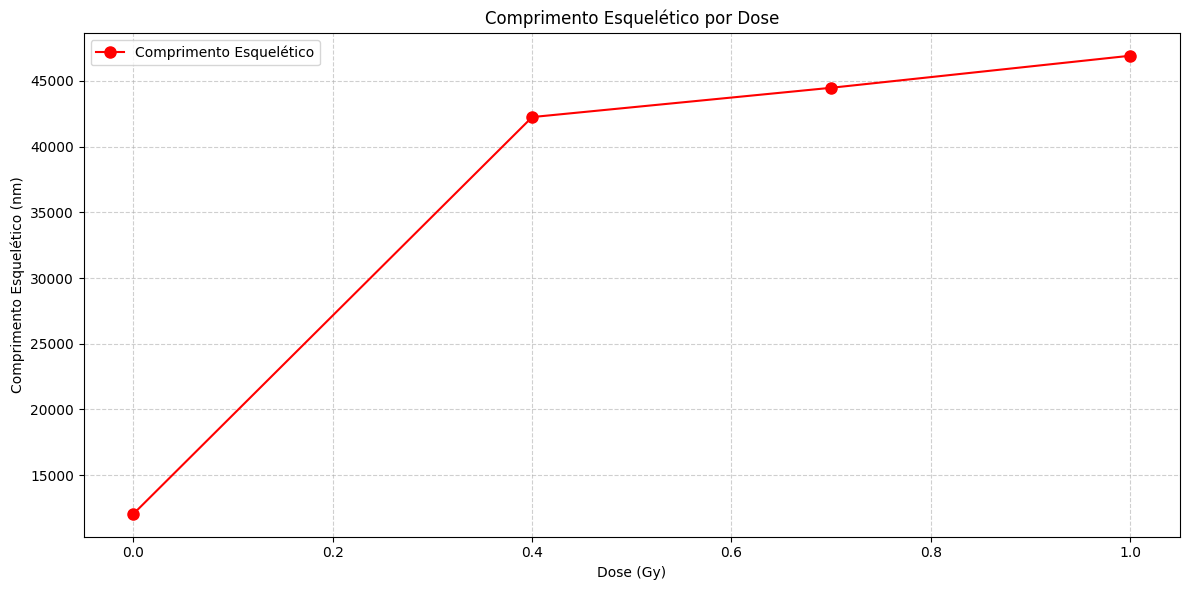

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_skeleton(image):
    """ Aplica o algoritmo de thinning para extrair o esqueleto. """
    skeleton = cv2.ximgproc.thinning(image)
    return skeleton

def calculate_skeleton_length(skeleton):
    """ Calcula o comprimento total do esqueleto. """
    contours, _ = cv2.findContours(skeleton, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    total_length = sum(cv2.arcLength(cnt, closed=False) for cnt in contours)  # Soma dos comprimentos
    return total_length

def process_images(image_path, dose):
    """ Processa a imagem, extrai o esqueleto e calcula seu comprimento. """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise FileNotFoundError(f"A imagem '{image_path}' não foi encontrada.")

    # 🔹 Suavizar e binarizar
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    binary_image = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # 🔹 Remover ruído
    kernel = np.ones((2,2), np.uint8)
    clean_binary = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

    # 🔹 Gerar esqueleto
    skeleton = compute_skeleton(clean_binary)

    # 🔹 Calcular comprimento do esqueleto
    skeleton_length = calculate_skeleton_length(skeleton)

    return {'Dose': dose, 'Comprimento Esquelético': skeleton_length}

def plot_results(results):
    """ Plota o gráfico de Comprimento Esquelético por Dose. """
    doses = [r['Dose'] for r in results]
    skeleton_lengths = [r['Comprimento Esquelético'] for r in results]

    plt.figure(figsize=(12, 6))
    plt.plot(doses, skeleton_lengths, 'o-', label='Comprimento Esquelético', color='red', markersize=8)
    plt.title('Comprimento Esquelético por Dose')
    plt.xlabel('Dose (Gy)')
    plt.ylabel('Comprimento Esquelético (nm)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 🔹 Função principal para processar todas as imagens
def main():
    image_paths = {
        0: '/content/Amostra Test 1_sem irradiar 2023-08-23 08h42m28.png',
        0.4: '/content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png',
        0.7: '/content/Water Bath 0,7Gy 2023-10-25 14h57m27.png',
        1: '/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png'
    }

    results = []
    for dose, path in image_paths.items():
        print(f"Processando: {dose} Gy")
        results.append(process_images(path, dose))

    # 🔹 Plotar gráfico final
    plot_results(results)

# 🔹 Executa o código
if __name__ == "__main__":
    main()

Dose: Sem Irradiar
  Comprimento Esquelético do DNA: 131913.57 nm
  Quantidade de RNA: 55

Dose: 0.4 Gy
  Comprimento Esquelético do DNA: 71124.36 nm
  Quantidade de RNA: 4

Dose: 0.7 Gy
  Comprimento Esquelético do DNA: 92448.93 nm
  Quantidade de RNA: 27

Dose: 1 Gy
  Comprimento Esquelético do DNA: 100890.75 nm
  Quantidade de RNA: 44



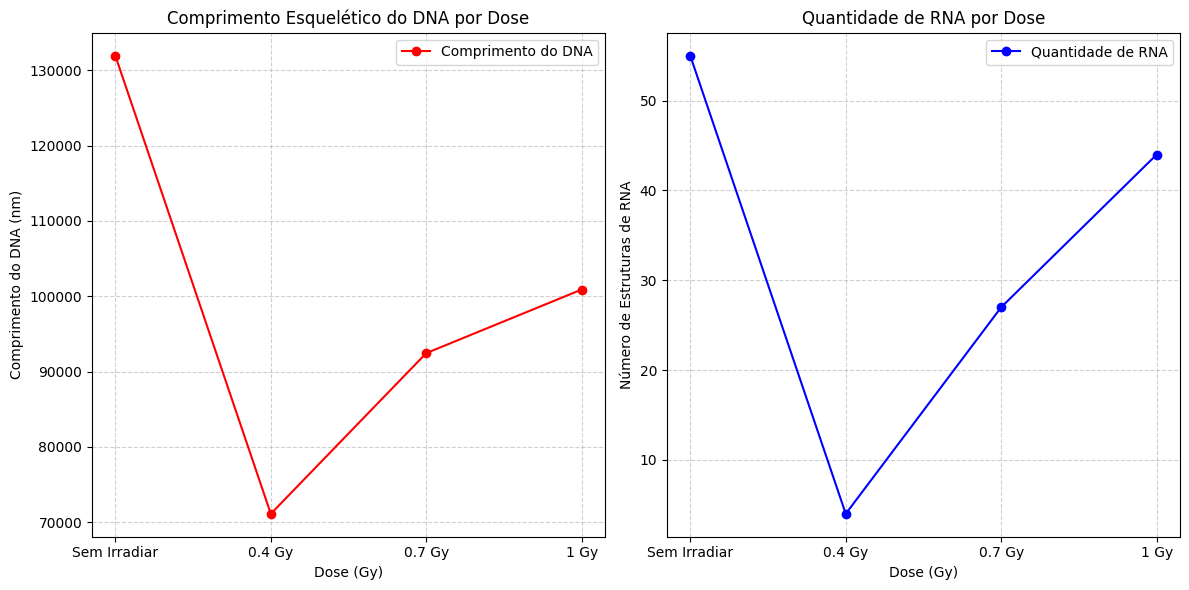

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_skeleton_length(image):
    """Calcula o comprimento do esqueleto da imagem."""
    skeleton = cv2.ximgproc.thinning(image)  # Reduz para esqueleto de 1 pixel
    return np.sum(skeleton > 0)  # Conta os pixels no esqueleto

def process_images(image_paths):
    results = []

    for dose, image_path in image_paths.items():
        # Carregar a imagem em escala de cinza
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            raise FileNotFoundError(f"A imagem '{image_path}' não foi encontrada.")

        # Aplicar suavização para reduzir ruído
        blurred = cv2.GaussianBlur(image, (5, 5), 0)

        # Binarização adaptativa
        binary_image = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 5)

        # Aplicar morfologia para limpar pequenas partículas e buracos
        kernel = np.ones((2, 2), np.uint8)
        clean_binary = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

        # Encontrar contornos
        contours, _ = cv2.findContours(clean_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        dna_length = 0
        rna_count = 0

        for contour in contours:
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)

            if perimeter == 0:
                continue  # Evita divisão por zero

            circularity = 4 * np.pi * (area / (perimeter ** 2))

            if circularity > 0.8:
                rna_count += 1  # Contar RNA (bolinhas)
            else:
                mask = np.zeros_like(image)
                cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
                dna_length += compute_skeleton_length(mask)  # Medir DNA

        # Obter fator de conversão para nanômetros
        height, width = image.shape
        conversion_factors = {256: 11.72, 258: 11.63, 512: 5.86, 514: 5.79, 1024: 2.93}
        conversion_factor = conversion_factors.get(width, 1)

        dna_length_nm = dna_length * conversion_factor

        results.append({
            'Dose': dose,
            'Comprimento Esquelético (DNA)': dna_length_nm,
            'Quantidade de RNA': rna_count
        })

    return results

def plot_results(results):
    doses = [r['Dose'] for r in results]
    dna_lengths = [r['Comprimento Esquelético (DNA)'] for r in results]
    rna_counts = [r['Quantidade de RNA'] for r in results]

    plt.figure(figsize=(12, 6))

    # Gráfico do comprimento do DNA
    plt.subplot(1, 2, 1)
    plt.plot(doses, dna_lengths, 'o-', label='Comprimento do DNA', color='red')
    plt.xlabel('Dose (Gy)')
    plt.ylabel('Comprimento do DNA (nm)')
    plt.title('Comprimento Esquelético do DNA por Dose')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

    # Gráfico da contagem de RNA
    plt.subplot(1, 2, 2)
    plt.plot(doses, rna_counts, 'o-', label='Quantidade de RNA', color='blue')
    plt.xlabel('Dose (Gy)')
    plt.ylabel('Número de Estruturas de RNA')
    plt.title('Quantidade de RNA por Dose')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    image_paths = {
        'Sem Irradiar': '/content/3min_water bath 2023-10-26 14h43m01.png',
        '0.4 Gy': '/content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png',
        '0.7 Gy': '/content/Amostrairradiada_02_0,7Gy_3x3.png',
        '1 Gy': '/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png'
    }

    results = process_images(image_paths)

    for r in results:
        print(f"Dose: {r['Dose']}")
        print(f"  Comprimento Esquelético do DNA: {r['Comprimento Esquelético (DNA)']:.2f} nm")
        print(f"  Quantidade de RNA: {r['Quantidade de RNA']}\n")

    plot_results(results)

if __name__ == "__main__":
    main()


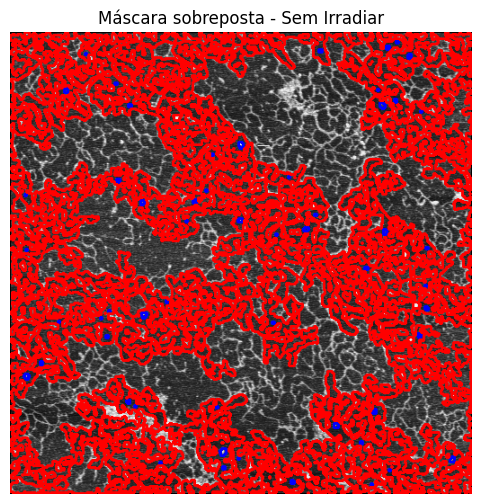

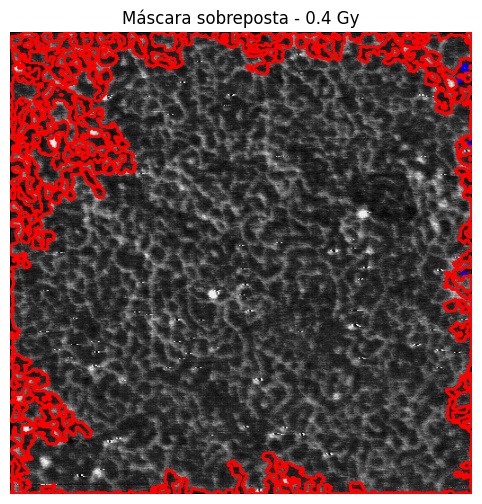

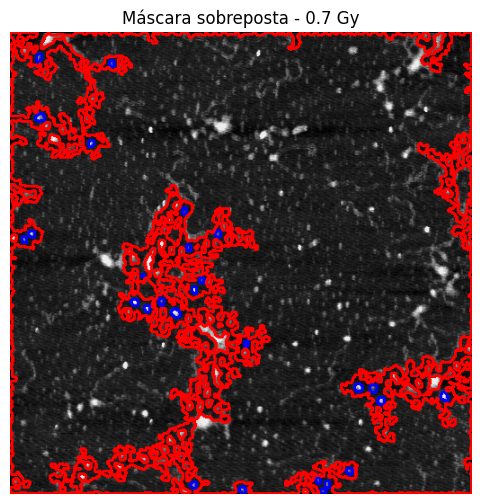

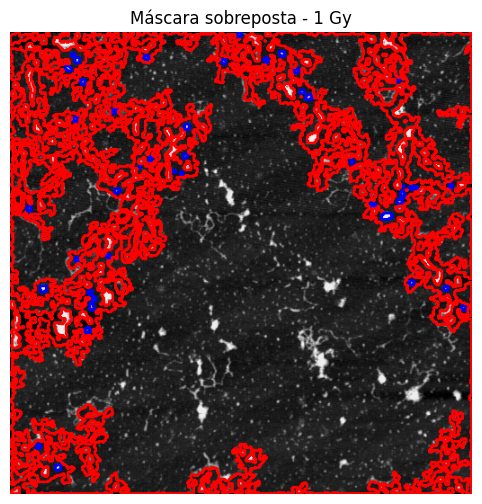

Dose: Sem Irradiar
  Comprimento Esquelético do DNA: 22783.00 nm
  Quantidade de RNA: 55

Dose: 0.4 Gy
  Comprimento Esquelético do DNA: 12284.00 nm
  Quantidade de RNA: 4

Dose: 0.7 Gy
  Comprimento Esquelético do DNA: 15967.00 nm
  Quantidade de RNA: 27

Dose: 1 Gy
  Comprimento Esquelético do DNA: 17425.00 nm
  Quantidade de RNA: 44



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_skeleton_length(image):
    """Calcula o comprimento do esqueleto da imagem."""
    skeleton = cv2.ximgproc.thinning(image)  # Reduz para esqueleto de 1 pixel
    return np.sum(skeleton > 0)  # Conta os pixels no esqueleto

def process_images(image_paths):
    results = []

    for dose, image_path in image_paths.items():
        # Carregar a imagem em escala de cinza
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            raise FileNotFoundError(f"A imagem '{image_path}' não foi encontrada.")

        # Aplicar suavização para reduzir ruído
        blurred = cv2.GaussianBlur(image, (5, 5), 0)

        # Binarização adaptativa
        binary_image = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 5)

        # Aplicar morfologia para limpar pequenas partículas e buracos
        kernel = np.ones((2, 2), np.uint8)
        clean_binary = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

        # Encontrar contornos
        contours, _ = cv2.findContours(clean_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        dna_length = 0
        rna_count = 0

        # Criar imagem colorida para sobrepor as máscaras
        overlay = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

        for contour in contours:
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)

            if perimeter == 0:
                continue  # Evita divisão por zero

            circularity = 4 * np.pi * (area / (perimeter ** 2))

            if circularity > 0.8:
                rna_count += 1  # Contar RNA (bolinhas)
                cv2.drawContours(overlay, [contour], -1, (255, 0, 0), 2)  # Desenhar RNA em azul
            else:
                mask = np.zeros_like(image)
                cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
                dna_length += compute_skeleton_length(mask)  # Medir DNA
                cv2.drawContours(overlay, [contour], -1, (0, 0, 255), 2)  # Desenhar DNA em vermelho

        # Exibir imagem com sobreposição das máscaras
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
        plt.title(f"Máscara sobreposta - {dose}")
        plt.axis("off")
        plt.show()

        results.append({
            'Dose': dose,
            'Comprimento Esquelético (DNA)': dna_length,
            'Quantidade de RNA': rna_count
        })

    return results

def main():
    image_paths = {
        'Sem Irradiar': '/content/3min_water bath 2023-10-26 14h43m01.png',
        '0.4 Gy': '/content/Amostra 1_0,4 Gy 2023-10-18 15h17m27.png',
        '0.7 Gy': '/content/Amostrairradiada_02_0,7Gy_3x3.png',
        '1 Gy': '/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png'
    }

    results = process_images(image_paths)

    for r in results:
        print(f"Dose: {r['Dose']}")
        print(f"  Comprimento Esquelético do DNA: {r['Comprimento Esquelético (DNA)']:.2f} nm")
        print(f"  Quantidade de RNA: {r['Quantidade de RNA']}\n")

if __name__ == "__main__":
    main()
